In [ ]:
# Logistic Regression
# Digunakan untuk mempredisi probabilitas kejadian biner (misal: cacat/tidak cacat, churn/tidak churn, spam/ham)
# Kalau regresi linear memprediksi nilai kontinu, maka logistic regression memprediksi peluang (probability) antara 1 dan 0

# Logistic Response Function and Logit
# Logistic Function:
# p = 1/1+e^-(b0+b1x)
# p = probabilitas hasil = 1 (misal: positif, churn, cacat)
# b0,b1 = koefisien model
# x =  nilai fitur prediktor
# Ciri khas logistic function -> output selalu antara 0 dan 1, bentuknya S-shaped (sigmoid curve)
# Logit Function:
# logit(p): ln(p/1-p) = b0 + b1x
# logit(p) disebut log-odds (log dari peluang sukses dibanding gagal)
# Logistic Regression adalah regresi linear terhadap log-odds, bukan terhadap probabilitas langsung

# Logistic Regression dan GLM (Generalized Linear Model)
# GLM = Kerangka umum untuk memodelkan hubungan antara:
# g(E[Y]) = Xb
# dimana:
# E[Y] -> nilai harapan dari Y
# g(.) -> link function
# Xb -> kombinasi linear dari prediktor
# Jadi logistic regression = GLM(binomial, logit link)

# Predicted Values from Logistic Regression
# Setelah model dipelajari, kita bisa hitungL
# P = 1/1+e^-(b0+b1x1+b2x2+...+bkxk)
# jika P > 0.5 -> prediksi kelas 1
# jika P < 0.5 -> prediksi kelas 0
# Kita juga bisa ubah treshold(bukan hanya 0.5) tergantung konteks bisnis

# Intepreting the Coefficients and Odds Ratio
# Koefisien bi menggambarkan perubahan log-odds ketika xi naik 1 unit
# logit(p) = b0+b1x1+....
# jika kita eksponensialkan:
# odds ratio = e^bi
# e^bi > 1 -> peluang naik
# e^bi < 1 -> peluang turun
# e^bi = 1 -> tidak berpengaruh
# Contoh:
# jika b1 = 0.7, maka e^0.7=2.01 -> peluang outcome positif 2x lebih besar untuk setiap kenaikan 1 unit

# Analysis for Residuals
# Residual pada logistic regression = bukan selisih langsung, tapi:
# ri = yi - Pi
# ada juga:
# Deviance Residuals -> mengukur perbedaan likelihood aktual vs prediksi
# Standardized Residuals -> mendeteksi outlier atau data berpengaruh tinggi
# Analisis residual dipakai untuk:
# Mengecek fit model (under/overfit)
# Deteksi outlier dan influential points
# Validasi asumsi GLM (misal, tidak ada separasi sempurna)

# Di regresi logistik:
# Kelas 0 -> tidak selamat, tidak cacat, tidak churn
# Kelas 1 -> Selamat, Cacat, Churn

import pandas as pd
from scipy import stats
import numpy as np
import statsmodels.api as sm

In [7]:
# Tambahkan konstanta untuk intercept

# 1. Ambil datanya
df = pd.read_csv(r"C:\Users\Robyi\Documents\Data Science Dataset\diabetes.csv")

# Variabel independen (X) dan dependen (Y)
X = df[['Glucose', 'BloodPressure', 'BMI']]
y = df['Outcome']

X_const = sm.add_constant(X)

# Fit model
model = sm.Logit(y, X_const)
result = model.fit()

# Tampilkan ringkasan model
print(result.summary())

# Kolom	Arti
# coef	            Koefisien log-odds
# std err	        Standard error
# z	                Nilai statistik uji
# **P>	            z
# [0.025, 0.975]	95% Confidence Interval

#Interpretasi:
# BMI = 0.0798: koef positif -> semakin tinggi BMI, peluang terkena diabetes meningkat
# Glucose = 0.0357: koef positif -> semakin tinggi glukosa, peluang terkena diabetes meningkat

# BloodPressure = -0.0074: koef negatif -> semakin tinggi tekanan darah, peluang terkena diabetes menurun. 
# tapi pvalue > 0.05 maka tekanan darah tidak berpengaruh terhadap diabetes 

Optimization terminated successfully.
         Current function value: 0.500694
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      764
Method:                           MLE   Df Model:                            3
Date:                Sun, 16 Nov 2025   Pseudo R-squ.:                  0.2259
Time:                        12:37:08   Log-Likelihood:                -384.53
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.227e-48
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -7.1823      0.636    -11.301      0.000      -8.428      -5.937
Glucose           0.

In [8]:
# Odds ratio dari setiap koefisien
odds_ratios = np.exp(result.params)
print(odds_ratios)

# Glucose = koef(0,0357) -> Odds Ratio(1.03)
# Jadi: 1,03 - 1 = 0.03
# Maka, setiap kenaikan 1 unit glukosa, peluang diabetes meningkat 3% sehingga probabilitas ikut naik

# BloodPressure = koef(-0.0074) -> Odds Ratio (0.992)
# Jadi: 0.992 - 1 = -0.008
# Maka, setiap kenaikan 1 unit tekanan darah, peluang diabetes menurun 0.8% sehingga probabilitas ikut turun

# BMI = koef(0.0798) -> Odds Ratio(1.08)
# Jadi: 1.08 - 1 = 0.08
# Maka, setiap kenaikan 1 BMI, peluang diabetes meningkat 0.8%

const            0.000760
Glucose          1.036393
BloodPressure    0.992607
BMI              1.083062
dtype: float64


In [12]:
# Load data
# Ambil dataset kategorik
dt = pd.read_csv(r"C:\Users\Robyi\Documents\Data Science Dataset\titanic.csv")

dt['Sex'] = dt['Sex'].map({'male': 0, 'female': 1})
dt = dt.dropna()
# Variabel independen (X) dan dependen (Y)
Xt = dt[['Sex', 'Pclass', 'Age']]
yt = dt['Survived']

dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,26.5500,C103,S


In [10]:
# Tambahkan konstanta untuk intercept
X_constt = sm.add_constant(Xt)

# Fit model
modelt = sm.Logit(yt, X_constt)
resultt = modelt.fit()

# Tampilkan ringkasan model
print(resultt.summary())

#Interpretasi:
# Sex = 2.0509: koef positif -> jika anda wanita (karena kita mapping wanita = 1), maka peluang selamat meningkat
# Koefisien Sex adalah 2.0509 -> hitung rumus eksponensial: e^2.0509 = 13.55 -> jadi peluang wanita selamat adalah 13.5% lebih besar dibanding pria

# Pclass = -0.7626: koef negatif -> semakin tinggi kelas, peluang selamat menurun

Optimization terminated successfully.
         Current function value: 0.448450
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  183
Model:                          Logit   Df Residuals:                      179
Method:                           MLE   Df Model:                            3
Date:                Sun, 16 Nov 2025   Pseudo R-squ.:                  0.2912
Time:                        12:37:46   Log-Likelihood:                -82.066
converged:                       True   LL-Null:                       -115.78
Covariance Type:            nonrobust   LLR p-value:                 1.522e-14
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0509      0.838      2.448      0.014       0.409       3.693
Sex            2.8764      0.

In [13]:
# Odds ratio dari setiap koefisien
odds_ratiost = np.exp(resultt.params)
print(odds_ratiost)

# Sex = koef(2.8764) -> Odds Ratio(17.7495)
# Jadi: 17.7495 - 1 = 16.7495
# Maka, setiap untuk wanita, peluang selamat meningkat 160% dibanding pria

# Pclass = koef(-0.7626) -> Odds Ratio (0.4664)
# Jadi: 0.4664 - 1 = -0.5336
# Maka, setiap naik kelas, peluang selamat menurun 50%

const      7.774539
Sex       17.749550
Pclass     0.466470
Age        0.962750
dtype: float64


In [ ]:
# ============================================================
# CORRELATION ANALYSIS
# ============================================================

# Korelasi adalah ukuran kekuatan dan arah hubungan linear atau monotonic 
# antara dua variabel kuantitatif.
# Tujuan: memahami seberapa erat hubungan antar variabel, 
# apakah meningkatnya X juga meningkatkan Y, atau sebaliknya.

# ------------------------------------------------------------
# 1. PEARSON CORRELATION
# ------------------------------------------------------------
# Mengukur hubungan linear antara dua variabel kontinu.
# Rumus dasarnya:
#       r = cov(X, Y) / (σ_X * σ_Y)
# Nilai r berada antara -1 s.d. 1:
#   +1 = hubungan linear sempurna positif
#   0  = tidak ada hubungan linear
#   -1 = hubungan linear sempurna negatif
# Asumsi:
#   - Hubungan linear
#   - Data berdistribusi normal
#   - Tidak ada outlier ekstrem

# ------------------------------------------------------------
# 2. SPEARMAN RANK CORRELATION
# ------------------------------------------------------------
# Mengukur hubungan monotonic (tidak harus linear).
# Data dikonversi menjadi ranking, lalu dihitung korelasi antar ranking.
# Cocok untuk data ordinal atau data dengan hubungan tidak linear.
# Rumus:
#       ρ = 1 - (6 * Σd_i^2) / (n * (n^2 - 1))
# Keterangan:
#   - d_i = selisih ranking variabel X dan Y
#   - n   = jumlah observasi

# ------------------------------------------------------------
# 3. KENDALL'S TAU
# ------------------------------------------------------------
# Mengukur asosiasi ordinal berdasarkan pasangan konkordan dan diskordan.
# Ide dasar: membandingkan pasangan observasi (x_i, y_i) dan (x_j, y_j):
#   - Konkordan jika urutannya sama di X dan Y
#   - Diskordan jika urutannya berbeda
# Rumus (versi Tau-b):
#       τ = (C - D) / sqrt((C + D + T_X) * (C + D + T_Y))
#   - C = jumlah pasangan konkordan
#   - D = jumlah pasangan diskordan
#   - T_X, T_Y = jumlah ikatan (ties) di X dan Y
# Kendall lebih robust terhadap outlier dibanding Pearson.

# ------------------------------------------------------------
# 4. CANONICAL CORRELATION ANALYSIS (CCA)
# ------------------------------------------------------------
# Tujuan: menemukan hubungan linear antara dua set variabel (bukan hanya dua variabel tunggal).
# Misal:
#   - Set 1: X1, X2, X3
#   - Set 2: Y1, Y2
# CCA mencari kombinasi linier U = a1*X1 + a2*X2 + a3*X3 dan
#                                   V = b1*Y1 + b2*Y2
# sedemikian rupa sehingga korelasi antara U dan V maksimum.
#
# Hasil:
#   - Canonical Correlations (r1, r2, ...)
#   - Canonical Variates (kombinasi linier variabel asli)
#
# Interpretasi:
#   - Jika canonical correlation tinggi → ada hubungan kuat antar set variabel.
#   - Dapat digunakan untuk memahami hubungan antar grup variabel (misalnya: 
#     indikator psikologis dengan performa kerja).

# Catatan:
#   - CCA adalah generalisasi Pearson ke lebih dari dua variabel.
#   - Tidak cocok jika jumlah observasi kecil dibanding jumlah variabel.
#   - Dapat divalidasi dengan uji signifikansi (Wilks’ Lambda).

In [ ]:
# ============================================================
# KONSEP CANONICAL VARIATES (U1, U2, ... V1, V2, ...)
# ============================================================

# ------------------------------------------------------------
# Kenapa ada banyak U dan V?
# ------------------------------------------------------------
# Dalam CCA, kita tidak hanya mencari satu hubungan (U1 ↔ V1),
# tapi kita bisa menemukan beberapa pasang hubungan yang SALING TIDAK BERGANTUNG.
#
# Misalnya:
#   - U1 dan V1 adalah kombinasi pertama dari variabel X dan Y
#     yang menghasilkan korelasi TERTINGGI.
#   - Setelah itu, CCA mencari kombinasi baru (U2 dan V2)
#     yang masih berkorelasi satu sama lain, 
#     tapi TIDAK berkorelasi dengan U1 dan V1.
#
# Jadi U2 bukan "pengulangan" U1, melainkan "arah hubungan lain"
# yang sebelumnya belum terlihat.

# ------------------------------------------------------------
# Analogi sederhana
# ------------------------------------------------------------
# Bayangkan kita punya dua set variabel:
#   X = [X1, X2, X3]
#   Y = [Y1, Y2]
#
# CCA seperti mencari "sumbu pandang" di ruang data,
# di mana hubungan antara X dan Y terlihat paling kuat.
#
# - Sumbu pertama (U1 ↔ V1) adalah arah utama hubungan:
#     misalnya: kombinasi variabel X dan Y yang menjelaskan 
#     "hubungan fisiologis dengan performa kerja".
#
# - Sumbu kedua (U2 ↔ V2) adalah arah hubungan lain yang
#     tidak tumpang tindih dengan yang pertama:
#     misalnya: "hubungan emosional dengan kepuasan kerja".
#
# Karena U1 dan U2 mewakili *arah yang berbeda* dalam ruang variabel,
# nilainya pun akan berbeda walaupun datanya sama.

# ------------------------------------------------------------
# Analogi visual:
# ------------------------------------------------------------
# Bayangkan kamu punya dua awan titik data 3D (X dan Y).
# U1 dan V1 adalah "proyeksi" awan data pada arah pertama 
# di mana mereka paling sejajar.
# Setelah arah pertama "terpakai",
# U2 dan V2 adalah proyeksi pada arah lain (ortogonal)
# di mana mereka masih punya korelasi, tapi lebih kecil dari yang pertama.
#
# Jadi setiap pasangan (U, V) = satu "dimensi hubungan" baru
# yang berdiri sendiri.

# ------------------------------------------------------------
# Intinya:
# ------------------------------------------------------------
# - U1 dan V1 = kombinasi pertama (hubungan terkuat)
# - U2 dan V2 = kombinasi kedua (hubungan berikutnya, independen)
# - Nilainya berbeda karena mereka "melihat data dari sudut berbeda"
# - Data aslinya sama, tapi CCA mengekstrak dimensi hubungan 
#   satu per satu — mirip seperti PCA yang mengekstrak komponen.

In [ ]:
# ============================================================
# MEMAHAMI CANONICAL CORRELATION DARI SISI "CARA PANDANG DATA"
# ============================================================

# ------------------------------------------------------------
# IDE INTI
# ------------------------------------------------------------
# Canonical Correlation Analysis (CCA) bukan sekadar "menghitung korelasi"
# antara dua set variabel, tapi "mencari cara pandang baru terhadap data"
# di mana hubungan antar dua kelompok variabel terlihat paling jelas.

# Misal:
#   X-set = [X1, X2, X3]   --> variabel independen (misal: pengukuran fisiologis)
#   Y-set = [Y1, Y2]       --> variabel dependen (misal: performa mental)
#
# Secara langsung, mungkin X1 berhubungan lemah dengan Y1, 
# tapi kombinasi tertentu dari X1, X2, X3 bisa sangat terkait
# dengan kombinasi tertentu dari Y1, Y2.
#
# CCA mencoba mencari:
#   U1 = a1*X1 + a2*X2 + a3*X3   --> kombinasi terbaik dari X
#   V1 = b1*Y1 + b2*Y2            --> kombinasi terbaik dari Y
#
# sehingga korelasi antara U1 dan V1 adalah MAKSIMUM.
#
# Kemudian CCA akan mencari pasangan berikutnya (U2, V2), dst.,
# dengan syarat bahwa pasangan baru ini saling ortogonal 
# (tidak berkorelasi dengan pasangan sebelumnya).

# ------------------------------------------------------------
# MENGUBAH CARA PANDANG (PERSPEKTIF)
# ------------------------------------------------------------
# Jadi, daripada melihat hubungan antar variabel secara individual (X1 vs Y1, X2 vs Y2, dst.),
# CCA memutar ruang data menjadi "sumbu baru" — canonical variates —
# di mana hubungan antara dua grup variabel tampak paling jelas.
#
# Analogi:
#   Bayangkan kamu punya dua kamera:
#     - Kamera kiri memotret variabel X (X1, X2, X3)
#     - Kamera kanan memotret variabel Y (Y1, Y2)
#   Kedua gambar awal mungkin tampak acak, hubungan tidak jelas.
#   CCA mencari "sudut pandang kamera" baru (kombinasi linier variabel)
#   sehingga jika kamu lihat dari sudut itu, pola hubungan antar dua gambar 
#   (dua set variabel) jadi paling sejajar.
#
# Dari sudut ini muncullah "Canonical Variates":
#   - U1, U2, ... untuk grup X
#   - V1, V2, ... untuk grup Y
#
# Masing-masing pasangan (U1,V1), (U2,V2), dst. punya "canonical correlation" sendiri:
#   - r1 = korelasi tertinggi
#   - r2 = korelasi terbesar kedua yang ortogonal terhadap r1
#   - dst.
#
# Biasanya hanya 1–2 pasang pertama yang signifikan secara statistik dan substantif.

# ------------------------------------------------------------
# INTERPRETASI PRAKTIS
# ------------------------------------------------------------
# - Canonical weights (a_i, b_i) menunjukkan kontribusi tiap variabel 
#   dalam membentuk kombinasi U dan V.
# - Canonical loadings (korelasi antara variabel asli dan canonical variate)
#   membantu kita memahami "makna" dari tiap canonical variate.
# - Jika U1 sangat berkorelasi dengan, misal, tekanan darah dan denyut jantung,
#   dan V1 sangat berkorelasi dengan kecepatan reaksi mental,
#   maka pasangan (U1, V1) bisa diinterpretasikan sebagai
#   "hubungan antara kondisi fisiologis dan performa mental".
#
# Dengan demikian, CCA tidak hanya mencari korelasi,
# tapi juga mengungkap struktur laten — hubungan multidimensional antar dua grup variabel.

In [1]:
# ======================================================
# CORRELATION ANALYSIS (Quality Engineering)
# ======================================================

import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr, kendalltau
from sklearn.cross_decomposition import CCA

# ------------------------------------------------------
# Contoh data: faktor proses vs hasil kualitas
# ------------------------------------------------------
np.random.seed(0)
Suhu = np.random.normal(200, 5, 20)
Tekanan = np.random.normal(10, 1, 20)
Kekuatan = 50 + 0.4*(Suhu-200) + 2*(Tekanan-10) + np.random.normal(0, 1.5, 20)
Cacat = 5 - 0.05*(Suhu-200) - 0.3*(Tekanan-10) + np.random.normal(0, 0.5, 20)

df = pd.DataFrame({
    'Suhu': Suhu,
    'Tekanan': Tekanan,
    'Kekuatan': Kekuatan,
    'Cacat': Cacat
})
print(df.head())

         Suhu    Tekanan   Kekuatan     Cacat
0  208.820262   7.447010  46.849296  4.988654
1  202.000786  10.653619  49.977525  4.524099
2  204.893690  10.864436  51.126943  4.089412
3  211.204466   9.257835  55.923619  3.799285
4  209.337790  12.269755  57.510147  3.940897


In [2]:
# ======================================================
# 1. Pearson, Spearman, Kendall
# ======================================================
print("\n=== CORRELATION TESTS ===")

r, p = pearsonr(df['Suhu'], df['Kekuatan'])
print(f"Pearson (Suhu vs Kekuatan): r={r:.2f}, p={p:.3f}")
# Jika skor korelasi Pearson:
#   > 0.7  → kuat
#   0.4–0.7 → sedang
#   0.2–0.4 → lemah
# p < 0.05 artinya hubungan signifikan secara statistik.

r, p = spearmanr(df['Tekanan'], df['Cacat'])
print(f"Spearman (Tekanan vs Cacat): r={r:.2f}, p={p:.3f}")
# Spearman dipakai kalau hubungan monotonic tapi tidak linear.

r, p = kendalltau(df['Suhu'], df['Cacat'])
print(f"Kendall (Suhu vs Cacat): tau={r:.2f}, p={p:.3f}")
# Kendall cocok untuk data ordinal atau banyak ties.


=== CORRELATION TESTS ===
Pearson (Suhu vs Kekuatan): r=0.64, p=0.002
Spearman (Tekanan vs Cacat): r=-0.59, p=0.006
Kendall (Suhu vs Cacat): tau=-0.43, p=0.007


In [3]:
# ======================================================
# 2. Canonical Correlation Analysis (CCA)
# ======================================================
print("\n=== CANONICAL CORRELATION ANALYSIS ===")

X = df[['Suhu', 'Tekanan']].values   # variabel proses
Y = df[['Kekuatan', 'Cacat']].values # variabel kualitas

cca = CCA(n_components=2)
cca.fit(X, Y)
U, V = cca.transform(X, Y)

# Hitung korelasi antar variat kanonik
corr1 = np.corrcoef(U[:,0], V[:,0])[0,1]
corr2 = np.corrcoef(U[:,1], V[:,1])[0,1]
print(f"Canonical correlations: [{corr1:.2f}, {corr2:.2f}]")

# Interpretasi sederhana:
# jika nilai pertama (misal 0.85) >> menunjukkan hubungan kuat antar kombinasi X dan Y
#   artinya kombinasi suhu & tekanan sangat berhubungan dengan kombinasi kekuatan & cacat
# nilai kedua biasanya lebih kecil → hubungan tambahan yang lebih lemah

# Variat kanonik (U1,V1,U2,V2)
print("\nContoh nilai variat kanonik (baris pertama):")
print("U1,U2 =", U[0])
print("V1,V2 =", V[0])
# Nilai U1/V1 berbeda karena mewakili kombinasi berbeda dari variabel aslinya.
# U1 terbentuk dari kombinasi linear suhu & tekanan yang paling menjelaskan variasi kualitas.
# U2 adalah kombinasi kedua yang ortogonal (tidak berkorelasi dengan U1).

# ======================================================
# INTERPRETASI AKHIR (ringkas)
# ======================================================
# - Jika Pearson > 0.7 → hubungan linear kuat antar dua variabel.
# - Jika Spearman signifikan → hubungan monotonic kuat, walau tidak linear.
# - Jika Kendall signifikan → hubungan ranking antar variabel konsisten.
# - Jika canonical correlation pertama > 0.6 → kombinasi variabel proses
#   (misal suhu dan tekanan) sangat berhubungan dengan kombinasi hasil kualitas
#   (misal kekuatan tarik tinggi dan cacat rendah).


=== CANONICAL CORRELATION ANALYSIS ===
Canonical correlations: [0.95, 0.07]

Contoh nilai variat kanonik (baris pertama):
U1,U2 = [-0.69229294  2.45183423]
V1,V2 = [-1.20248429  0.30744572]


In [ ]:
# ============================================================
# STATISTICAL TESTS IN QUALITY ENGINEERING (TEORI SEDERHANA)
# ============================================================

# ============================================================
# 1. BINOMIAL TEST
# ============================================================
# Tujuan:
# Menguji apakah proporsi keberhasilan (misal: produk lolos inspeksi)
# berbeda dari nilai target atau standar yang diharapkan.

# Contoh:
# Dari 100 produk, 92 memenuhi spesifikasi.
# Standar perusahaan: minimal 90% lolos.
# Gunakan Binomial Test untuk memeriksa apakah proporsi aktual (92%) 
# berbeda signifikan dari 90%.

# Asumsi:
# - Data berupa dua kategori (sukses/gagal)
# - Setiap sampel independen

# Interpretasi:
# p-value < 0.05 → proporsi nyata berbeda dari target.
# Cocok untuk quality control dengan data atribut (defect / no defect).


# ============================================================
# 2. POST HOC TEST (ANOVA)
# ============================================================
# Setelah ANOVA menunjukkan ada perbedaan antar grup,
# Post Hoc Test digunakan untuk melihat *grup mana* yang berbeda.

# Contoh di manufaktur:
# Tiga jenis bahan baku diuji kekuatan tariknya.
# ANOVA signifikan → artinya ada perbedaan.
# Post Hoc Test (misal Tukey HSD) menunjukkan bahan mana yang beda nyata.

# Asumsi:
# - Varian homogen antar grup (uji Levene / Bartlett)
# - Data normal


# ============================================================
# 3. MYRIAD POST HOC TESTS
# ============================================================
# Beberapa uji umum setelah ANOVA:
# - Tukey HSD → paling populer, untuk perbandingan berpasangan dengan kontrol FWER.
# - Bonferroni → konservatif, aman untuk banyak perbandingan.
# - Scheffé → fleksibel untuk semua kombinasi, konservatif.
# - Dunnett → membandingkan setiap grup terhadap kontrol.
# - Games-Howell → untuk data dengan varian tidak homogen.

# Praktis:
# - Tukey: default untuk data seimbang
# - Games-Howell: jika variansi tidak sama


# ============================================================
# 4. ANOVA RESIDUAL + PLOTTING
# ============================================================
# Tujuan:
# Mengecek apakah asumsi ANOVA terpenuhi.
# Residual analysis membantu memastikan:
# - Normalitas residual → dicek dengan QQ-plot atau Shapiro-Wilk
# - Homoskedastisitas → varian antar grup seragam
# - Tidak ada pola pada residual vs prediksi

# Plot penting:
# - Residual vs Fitted → acak = bagus
# - QQ Plot → titik dekat garis diagonal = normal
# - Histogram residual → simetris = bagus


# ============================================================
# 5. RANDOMIZED BLOCK DESIGN (RBD) & REPEATED MEASURES ANOVA
# ============================================================
# RANDOMIZED BLOCK DESIGN
# Digunakan saat ada faktor luar yang memengaruhi hasil,
# dan kita ingin mengontrolnya sebagai “block”.

# Contoh:
# Menguji tiga jenis pelumas (A, B, C) pada tiga mesin berbeda.
# Mesin → block (faktor yang dikontrol)
# Pelumas → faktor utama yang diuji

# Tujuan: mengurangi error dari variasi antar mesin.

# REPEATED MEASURES ANOVA
# Digunakan saat pengukuran dilakukan berulang pada unit yang sama.

# Contoh:
# Mengukur kekasaran permukaan produk sebelum, selama, dan sesudah proses polishing.
# Unit sama diukur berulang.
# Tujuan: melihat perubahan signifikan antar waktu pengukuran.


# ============================================================
# 6. ALTERNATIVES TO ANOVA (NON-PARAMETRIC)
# ============================================================
# Jika data tidak normal atau variansi tidak homogen,
# gunakan uji nonparametrik yang setara dengan ANOVA.

# KRUSKAL-WALLIS TEST
# Versi nonparametrik dari one-way ANOVA.
# Menggunakan ranking data, bukan nilai mentah.

# Contoh:
# Bandingkan tiga supplier bahan dengan data kekuatan yang tidak normal.
# H0: median semua grup sama.
# p-value < 0.05 → ada perbedaan median antar supplier.


# ============================================================
# 7. MANN-WHITNEY U TEST
# ============================================================
# Versi nonparametrik dari independent t-test (2 grup).

# Contoh:
# Bandingkan tingkat cacat antara mesin lama dan mesin baru.
# Jika p < 0.05 → perbedaan median cacat signifikan.

# Asumsi:
# - Data ordinal atau tidak normal
# - Distribusi bentuk serupa antar grup

# Interpretasi:
# Hasil uji menunjukkan apakah satu proses menghasilkan kualitas lebih baik 
# (median lebih tinggi/rendah) dibanding proses lain tanpa asumsi normalitas.

In [4]:
# ======================================================
# BINOMIAL TEST & ANOVA SERIES (Quality Engineering)
# ======================================================

import numpy as np
import pandas as pd
from scipy.stats import binomtest, f_oneway, kruskal, mannwhitneyu
from statsmodels.stats.multicomp import pairwise_tukeyhsd

np.random.seed(1)

In [5]:
# ------------------------------------------------------
# 1. BINOMIAL TEST
# ------------------------------------------------------
# Kasus: Dari 100 produk, 93 lolos inspeksi. Target kualitas = 90%.
result = binomtest(k=93, n=100, p=0.9, alternative='two-sided')
print("=== BINOMIAL TEST ===")
print(f"P-value = {result.pvalue:.3f}")

# Interpretasi:
# - Jika p < 0.05 → proporsi lolos berbeda signifikan dari target 90%.
# - Jika proporsi aktual (93%) > target dan signifikan, berarti performa di atas target.
# - Jika tidak signifikan → tidak cukup bukti bahwa performa berbeda dari target.
# ------------------------------------------------------

=== BINOMIAL TEST ===
P-value = 0.404


In [ ]:
# ------------------------------------------------------
# 2. ONE-WAY ANOVA
# ------------------------------------------------------
# Kasus: Bandingkan rata-rata kekuatan tiga bahan baku
A = np.random.normal(52, 1.5, 10)
B = np.random.normal(50, 1.5, 10)
D = np.random.normal(55, 1.5, 10)

F, p = f_oneway(A, B, C)
print("\n=== ONE-WAY ANOVA ===")
print(f"F = {F:.2f}, p-value = {p:.3f}")

# Interpretasi:
# - Jika p < 0.05 → ada perbedaan signifikan antara setidaknya dua bahan.
# - Jika p >= 0.05 → tidak ada perbedaan signifikan antar bahan.


=== ONE-WAY ANOVA ===
F = 29.26, p-value = 0.000


In [7]:
# ------------------------------------------------------
# 3. POST HOC TEST (Tukey HSD)
# ------------------------------------------------------
data = pd.DataFrame({
    'Kekuatan': np.concatenate([A, B, C]),
    'Bahan': ['A']*10 + ['B']*10 + ['C']*10
})
tukey = pairwise_tukeyhsd(data['Kekuatan'], data['Bahan'], alpha=0.05)
print("\n=== POST HOC TEST (Tukey HSD) ===")
print(tukey)

# Interpretasi:
# - Lihat kolom "reject" → True artinya perbedaan signifikan antar pasangan bahan.
# - Misal A vs B = True → kekuatan bahan A signifikan berbeda dengan B.
# ------------------------------------------------------


=== POST HOC TEST (Tukey HSD) ===
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B  -2.1087 0.0164 -3.8677 -0.3496   True
     A      C   3.2761 0.0002   1.517  5.0351   True
     B      C   5.3848    0.0  3.6257  7.1438   True
----------------------------------------------------


In [32]:
# ------------------------------------------------------
# 4. RANDOMIZED BLOCK DESIGN (RBD)
# ------------------------------------------------------
# Kasus: 3 pelumas diuji pada 3 mesin (mesin = blok)
df = pd.DataFrame({
    'Oli': np.repeat(['A', 'B', 'C'], 3),
    'CNC': np.tile(['M1', 'M2', 'M3'], 3),
    'Efisiensi': [88,90,85, 86,89,83, 92,91,90]
})
# Ensure columns are categorical
df['Oli'] = df['Oli'].astype('category')
df['CNC'] = df['CNC'].astype('category')

import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('Efisiensi ~ C(Oli) + C(CNC)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n=== RANDOMIZED BLOCK DESIGN ANOVA ===")
print(anova_table)

# Interpretasi:
# - C(Oli): efek jenis pelumas terhadap efisiensi.
# - C(CNC): efek perbedaan mesin (blok).
# - Nilai p < 0.05 artinya faktor tersebut signifikan memengaruhi hasil.
# ------------------------------------------------------


=== RANDOMIZED BLOCK DESIGN ANOVA ===
             sum_sq   df     F    PR(>F)
C(Oli)    38.888889  2.0  10.0  0.027778
C(CNC)    24.888889  2.0   6.4  0.056689
Residual   7.777778  4.0   NaN       NaN


In [12]:
# ------------------------------------------------------
# 5. REPEATED MEASURES ANOVA
# ------------------------------------------------------
# Kasus: Ukur kekasaran produk sebelum, tengah, sesudah proses.
from statsmodels.stats.anova import AnovaRM

df_rm = pd.DataFrame({
    'Produk': np.repeat(np.arange(1,6), 3),
    'Waktu': ['Sebelum','Tengah','Sesudah']*5,
    'Kekasaran': [5.1,4.8,4.5, 5.2,4.9,4.6, 5.0,4.8,4.4, 5.3,5.0,4.7, 5.1,4.7,4.3]
})
anova_rm = AnovaRM(df_rm, depvar='Kekasaran', subject='Produk', within=['Waktu']).fit()
print("\n=== REPEATED MEASURES ANOVA ===")
print(anova_rm)

# Interpretasi:
# - p < 0.05 → ada perbedaan signifikan antar waktu pengukuran.
# - Artinya kekasaran berubah sepanjang proses produksi.
# ------------------------------------------------------


=== REPEATED MEASURES ANOVA ===
               Anova
      F Value  Num DF Den DF Pr > F
-----------------------------------
Waktu 192.2500 2.0000 8.0000 0.0000



In [13]:
# ------------------------------------------------------
# 6. KRUSKAL-WALLIS TEST (Alternatif Nonparametrik ANOVA)
# ------------------------------------------------------
# Kasus: jika data tidak normal
A = np.random.exponential(1, 10)
B = np.random.exponential(1.3, 10)
C = np.random.exponential(1.5, 10)
H, p = kruskal(A, B, C)
print("\n=== KRUSKAL-WALLIS TEST ===")
print(f"H = {H:.2f}, p-value = {p:.3f}")

# Interpretasi:
# - p < 0.05 → median antar grup berbeda signifikan.
# - Dipakai kalau data tidak memenuhi asumsi normalitas.
# ------------------------------------------------------


=== KRUSKAL-WALLIS TEST ===
H = 6.47, p-value = 0.039


In [14]:
# ------------------------------------------------------
# 7. MANN-WHITNEY U TEST
# ------------------------------------------------------
# Kasus: bandingkan tingkat cacat dua mesin
lama = np.random.poisson(4, 10)
baru = np.random.poisson(2, 10)
U, p = mannwhitneyu(lama, baru, alternative='two-sided')
print("\n=== MANN-WHITNEY U TEST ===")
print(f"U = {U:.1f}, p-value = {p:.3f}")

# Interpretasi:
# - p < 0.05 → median tingkat cacat berbeda signifikan antara mesin lama & baru.
# - Test nonparametrik alternatif dari independent t-test.
# ------------------------------------------------------


=== MANN-WHITNEY U TEST ===
U = 92.0, p-value = 0.001


In [28]:
# ======================================================
# ANOVA RESIDUAL CHECKS (sederhana & interpretable)
# Context: quality engineering - cek asumsi ANOVA untuk data 'data' (kolom 'Kekuatan' & 'Bahan')
# ======================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy.stats import levene

# ------------------------------------------------------
# Jika belum punya 'data' (dari blok ANOVA sebelumnya), buat contoh singkat:
# (Hapus / lewati bagian ini jika kamu sudah punya objek `data` dari ANOVA sebelumnya)
np.random.seed(0)
A = np.random.normal(52, 1.5, 10)
B = np.random.normal(50, 1.5, 10)
D = np.random.normal(55, 1.5, 10)
data = pd.DataFrame({
    'Kekuatan': np.concatenate([A, B, C]),
    'Bahan': ['A']*10 + ['B']*10 + ['C']*10
})

data.head()

,Kekuatan,Bahan
0,54.646079,A
1,52.600236,A
2,53.468107,A
3,55.361340,A
4,54.801337,A


In [31]:
# ------------------------------------------------------
# Fit ANOVA model (one-way) untuk mendapatkan residuals & fitted
# ------------------------------------------------------
model = ols('Kekuatan ~ C(Bahan)', data=data).fit()

# Ambil fitted values dan residuals
fitted = model.fittedvalues
residuals = model.resid

# Ringkasan singkat model (optional)
print("ANOVA model summary (ringkas):")
print(model.summary().tables[0])

ANOVA model summary (ringkas):
                            OLS Regression Results                            
Dep. Variable:               Kekuatan   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     19.63
Date:                Fri, 07 Nov 2025   Prob (F-statistic):           5.45e-06
Time:                        20:15:07   Log-Likelihood:                -56.424
No. Observations:                  30   AIC:                             118.8
Df Residuals:                      27   BIC:                             123.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         


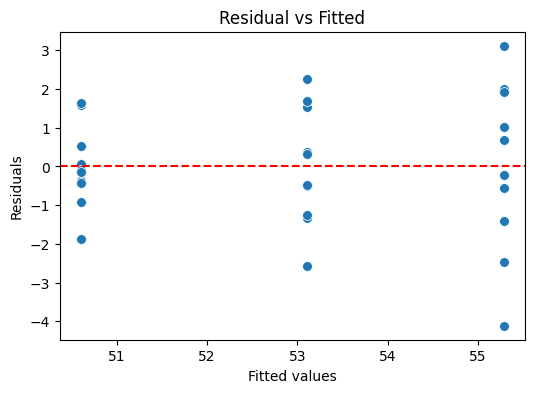

In [33]:
# ------------------------------------------------------
# 1) Residual vs Fitted plot (cek pola / homoskedastisitas)
# ------------------------------------------------------
plt.figure(figsize=(6,4))
sns.scatterplot(x=fitted, y=residuals, s=50)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual vs Fitted')
plt.show()
# Interpretasi singkat (bisa disalin ke laporan):
# - Jika titik bertebaran acak di sekitar garis 0 → asumsi homoskedastisitas terpenuhi.
# - Jika pola (mis. corong, lengkung) muncul → kemungkinan heteroskedastisitas atau tidak linear.

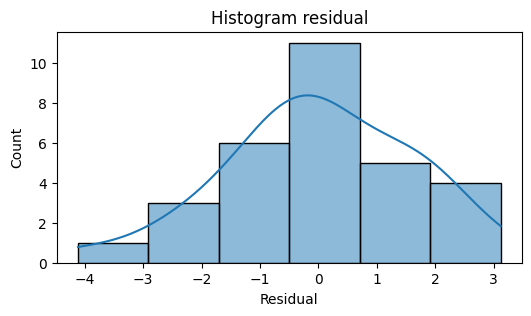

In [34]:
# ------------------------------------------------------
# 2) Histogram + KDE residual (cek distribusi)
# ------------------------------------------------------
plt.figure(figsize=(6,3))
sns.histplot(residuals, kde=True)
plt.title('Histogram residual')
plt.xlabel('Residual')
plt.show()
# Interpretasi:
# - Distribusi mendekati simetris/bell → mendukung asumsi normalitas residual.
# - Jika skewed atau multi-modal → asumsi normalitas diragukan.

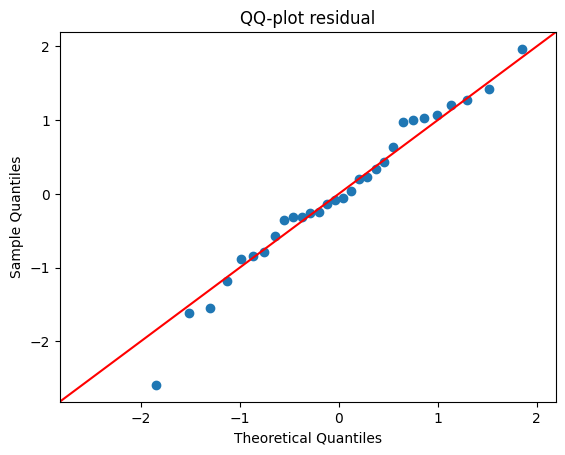

In [35]:
# ------------------------------------------------------
# 3) QQ-plot (visual normality check)
# ------------------------------------------------------
fig = sm.qqplot(residuals, line='45', fit=True)
plt.title('QQ-plot residual')
plt.show()
# Interpretasi:
# - Titik dekat garis diagonal → residual ~ normal.
# - Penyimpangan sistematis (ekor menjauh) → non-normalitas.

In [36]:
# ------------------------------------------------------
# 4) Shapiro-Wilk test (uji formal normalitas)
# ------------------------------------------------------
stat, p = shapiro(residuals)
print(f"Shapiro-Wilk: W={stat:.3f}, p={p:.3f}")
if p > 0.05:
    print(" -> Interpretasi: tidak menolak normalitas residual (cukup normal).")
else:
    print(" -> Interpretasi: menolak normalitas residual (tidak normal).")

Shapiro-Wilk: W=0.980, p=0.835
 -> Interpretasi: tidak menolak normalitas residual (cukup normal).


In [37]:
# ------------------------------------------------------
# 5) Levene test (uji homogenitas varians antar grup)
# ------------------------------------------------------
groups = [group["Kekuatan"].values for name, group in data.groupby("Bahan")]
stat, p = levene(*groups)
print(f"\nLevene test (homogenitas varians): stat={stat:.3f}, p={p:.3f}")
if p > 0.05:
    print(" -> Interpretasi: varians antar grup seragam (homogen).")
else:
    print(" -> Interpretasi: varians antar grup berbeda (heteroskedastisitas).")


Levene test (homogenitas varians): stat=2.752, p=0.082
 -> Interpretasi: varians antar grup seragam (homogen).


In [38]:
# ------------------------------------------------------
# 6) Kesimpulan singkat otomatis (bisa langsung dipakai di laporan)
# ------------------------------------------------------
print("\nKESIMPULAN SINGKAT (otomatis):")
# normality flag
normal_flag = p > 0.05 and (shapiro(residuals)[1] > 0.05)
if normal_flag and (levene(*groups)[1] > 0.05):
    print(" - Residual tampak normal dan varians antar grup homogen. ANOVA asumsi terpenuhi.")
else:
    print(" - Minimal satu asumsi ANOVA dilanggar (normalitas atau homogenitas).")
    print("   Saran: gunakan transformasi (mis. log), atau uji nonparametrik (Kruskal-Wallis),")
    print("   atau gunakan metode yang robust terhadap heteroskedastisitas (mis. Welch ANOVA).")

# Catatan singkat:
# - Untuk laporan singkat: copy-paste kalimat interpretasi dari bagian 'Interpretasi' di atas.
# - Jika asumsi dilanggar: jangan lanjutkan ke tukey tanpa menyesuaikan; gunakan alternatif.


KESIMPULAN SINGKAT (otomatis):
 - Residual tampak normal dan varians antar grup homogen. ANOVA asumsi terpenuhi.


In [ ]:
# ============================================================
# MANOVA — TEORI SEDERHANA (untuk Quality Engineering)
# ============================================================

# ------------------------------------------------------------
# Apa itu MANOVA?
# ------------------------------------------------------------
# - MANOVA = Multivariate Analysis of Variance.
# - Digunakan ketika ada >1 variabel respon (mis. kekuatan & kekasaran).
# - Tujuan: uji apakah kombinasi rata-rata variabel respon berbeda antar grup.
# - Relevansi quality engineering: cek apakah pengaturan proses memengaruhi
#   beberapa aspek kualitas secara bersamaan.

# ------------------------------------------------------------
# Mengapa MANOVA berbeda dari ANOVA (F-ratio)?
# ------------------------------------------------------------
# - ANOVA (F-ratio) menguji PER-VARIABEL (satu-respon) apakah mean berbeda antar grup.
# - MANOVA menguji gabungan variabel (multivariat) secara simultan.
# - MANOVA memperhitungkan korelasi antar variabel respon:
#   dua perbedaan kecil di tiap variabel bisa bersama-sama jadi perbedaan penting.
# - Ringkas: ANOVA = 1-dimensi; MANOVA = multi-dimensi (ruang variabel).

# ------------------------------------------------------------
# Statistika multivariat utama pada output MANOVA
# (inti: masing-masing menguji apakah centroid multivariat berbeda)
# ------------------------------------------------------------
# 1) Wilks' Lambda (Λ)
#    - Rasio varians "dalam" terhadap total varians multivariat.
#    - Nilai 0..1; semakin kecil → bukti lebih kuat bahwa grup berbeda.
#    - Interpretasi praktis: Λ kecil → efek grup besar.

# 2) Pillai's Trace (V)
#    - Sum of explained variances (lebih robust terhadap pelanggaran asumsi).
#    - Nilai 0..min(p,q); semakin besar → efek grup lebih kuat.
#    - Recommended saat asumsi mungkin dilanggar.

# 3) Hotelling–Lawley Trace (T)
#    - Mirip Pillai tetapi terfokus pada rasio antara explained/unexplained.
#    - Lebih sensitif untuk efek tertentu.

# 4) Roy's Largest Root
#    - Berdasarkan eigenvalue terbesar; menilai dimensi paling kuat saja.
#    - Kadang terlalu fokus pada satu dimensi; gunakan hati-hati.

# ------------------------------------------------------------
# Kapan hasilnya "signifikan"?
# ------------------------------------------------------------
# - Setiap statistik punya p-value.
# - Jika p < α (biasanya 0.05) → tolak H0: ada perbedaan multivariat antar grup.
# - Karena statistik berbeda-cara, mereka kadang tidak identik; Pillai lebih konservatif/robust.

# ------------------------------------------------------------
# Effect size sederhana untuk MANOVA
# ------------------------------------------------------------
# - Salah satu pendekatan praktis: 1 − Wilks' Lambda  ≈ multivariate eta-squared.
# - Pedoman kasar (seperti Cohen):
#    ~0.01 = kecil, ~0.06 = sedang, ~0.14 = besar.
# - Gunakan effect size untuk menilai signifikansi praktis (engineering), bukan hanya p-value.

# ------------------------------------------------------------
# "Bird's eye" view — cara memandang MANOVA secara intuitif
# ------------------------------------------------------------
# - Bayangkan ruang berdimensi = jumlah variabel respon (mis. 2D untuk kekuatan+kekasaran).
# - Setiap grup (setting mesin) punya centroid (mean vector) di ruang itu.
# - MANOVA menilai apakah centroid-centroid ini berbeda lebih dari variasi internal grup.
# - Jika centroid terpisah → proses mempengaruhi kombinasi kualitas (bukan hanya satu metrik).

# ------------------------------------------------------------
# Asumsi penting MANOVA (cek sebelum interpretasi)
# ------------------------------------------------------------
# 1) Multivariate normality
#    - Setiap grup variabel respon mengikuti distribusi normal multivariat.
#    - Praktis: cek normalitas tiap variabel per grup (Shapiro) + inspeksi multivariate (Mahalanobis/QQ).
#    - Pelanggaran ringan bisa ditoleransi jika ukuran sampel besar dan seimbang.

# 2) Homogeneity of covariance matrices (homogenitas kovarians)
#    - Matriks kovarians antar variabel respon sebaiknya serupa antar grup.
#    - Jika dilanggar, hasil (terutama Wilks/Hotelling) bisa bias.
#    - Box's M test biasanya dipakai untuk menguji ini (lebih sensitif terhadap normalitas).

# 3) Independensi observasi
#    - Observasi harus independen; repeated measures butuh metode lain.

# ------------------------------------------------------------
# Jika asumsi dilanggar — langkah praktis
# ------------------------------------------------------------
# - Jika non-normal atau kovarians tidak homog: gunakan Pillai's Trace (lebih robust).
# - Pertimbangkan transformasi variabel (log, sqrt) untuk normalitas.
# - Gunakan bootstrap untuk p-value/CI robust.
# - Untuk repeated measures gunakan MANOVA spesifik atau mixed models.

# ------------------------------------------------------------
# Langkah analisis praktis (alur recommended)
# ------------------------------------------------------------
# 1. Visualisasi: scatter plot 2D (pairwise), centroids per grup, confidence ellipses.
# 2. Cek asumsi: normalitas per variabel & Box's M (homogenitas kovarians).
# 3. Jalankan MANOVA -> lihat Wilks/Pillai/Hotelling & p-values.
# 4. Jika signifikan → lakukan follow-up univariate ANOVA per variabel + post-hoc.
# 5. Laporkan effect size (1 − Wilks) + interpretasi engineering (apakah beda praktis penting).

# ------------------------------------------------------------
# Contoh kalimat interpretasi singkat (bisa langsung dipakai di laporan)
# ------------------------------------------------------------
# - "MANOVA (Wilks' Λ) menunjukkan p = 0.02 → kombinasi kekuatan dan kekasaran berbeda antar setting mesin."
# - "Effect size (1 − Λ) = 0.12 → efek sedang/makna praktis terhadap kualitas produk."
# - "Pillai's Trace juga signifikan → hasil robust terhadap kemungkinan pelanggaran asumsi."
# - "Lanjutkan dengan ANOVA univariat untuk menentukan variabel kualitas mana yang paling berkontribusi."

In [41]:
# ======================================================
# MANOVA (Multivariate Analysis of Variance)
# Context: Quality Engineering
# ======================================================

import numpy as np
import pandas as pd
from statsmodels.multivariate.manova import MANOVA
from scipy.stats import shapiro, levene, boxcox
from sklearn.covariance import EmpiricalCovariance

# ------------------------------------------------------
# KASUS: Bandingkan 3 setting mesin terhadap 2 hasil kualitas
# ------------------------------------------------------
np.random.seed(42)

# Faktor: setting mesin
# Variabel respon: kekuatan tarik (MPa) dan kekasaran permukaan (µm)
A = np.column_stack([
    np.random.normal(50, 2, 10),   # kekuatan
    np.random.normal(3, 0.3, 10)   # kekasaran
])
B = np.column_stack([
    np.random.normal(55, 2, 10),
    np.random.normal(2.7, 0.3, 10)
])
D = np.column_stack([
    np.random.normal(60, 2, 10),
    np.random.normal(2.5, 0.3, 10)
])

df = pd.DataFrame(np.vstack([A,B,D]), columns=['Kekuatan','Kekasaran'])
df['Mesin'] = ['A']*10 + ['B']*10 + ['D']*10
print(df.head())

    Kekuatan  Kekasaran Mesin
0  50.993428   2.860975     A
1  49.723471   2.860281     A
2  51.295377   3.072589     A
3  53.046060   2.426016     A
4  49.531693   2.482525     A


In [42]:
# ======================================================
# 1. JALANKAN MANOVA
# ======================================================
maov = MANOVA.from_formula('Kekuatan + Kekasaran ~ Mesin', data=df)
print(maov.mv_test())

# Interpretasi dasar:
# - Wilks' Lambda, Pillai's Trace, Hotelling-Lawley Trace, Roy's Root semuanya menguji hal yang sama:
#   “Apakah kombinasi variabel kualitas berbeda signifikan antar mesin?”
# - Jika p < 0.05 pada salah satu → ada perbedaan multivariat signifikan antar grup.

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value   Num DF  Den DF  F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda   0.0020 2.0000 26.0000 6413.6798 0.0000
         Pillai's trace   0.9980 2.0000 26.0000 6413.6798 0.0000
 Hotelling-Lawley trace 493.3600 2.0000 26.0000 6413.6798 0.0000
    Roy's greatest root 493.3600 2.0000 26.0000 6413.6798 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
             Mesin          Value  Num DF  Den DF F Value Pr > F
----------------------------------------------------------------
              Wilks' lambda 0.1571 4.0000 52.0000 19.8001 0.0000
             Pillai's trace 0.8573 4.0000 54.

In [ ]:
# ======================================================
# 2. APA BEDANYA MANOVA DENGAN ANOVA BIASA?
# ======================================================
# ANOVA = membandingkan satu variabel respon antar grup
# MANOVA = membandingkan kombinasi beberapa variabel respon antar grup secara simultan.
# Jadi MANOVA memperhitungkan hubungan antar variabel respon (korelasi antar Y).

# Contoh:
# ANOVA terpisah akan menguji kekuatan dan kekasaran secara sendiri-sendiri.
# MANOVA melihat pola bersama antara kekuatan & kekasaran.
# Ini penting di quality engineering, karena kualitas jarang berdiri sendiri.

# ======================================================
# 3. STATISTIK MANOVA
# ======================================================
# Wilks’ Lambda:
#   - Rasio varians dalam vs total varians multivariat.
#   - Semakin kecil → semakin besar efek grup (semakin signifikan).
# Pillai’s Trace:
#   - Lebih robust terhadap pelanggaran asumsi.
#   - Semakin besar → semakin besar efek grup.
# Hotelling–Lawley Trace & Roy’s Root:
#   - Alternatif lain, umumnya hasilnya serupa jika data ideal.

In [52]:
# ======================================================
# 4. EFFECT SIZE SEDERHANA UNTUK MANOVA
# ======================================================
# Kita ambil Wilks' Lambda dari output
result = maov.mv_test()
wilks_lambda = result.results['Mesin']['stat'].loc["Wilks' lambda", 'Value']
eta_sq = 1 - wilks_lambda  # pendekatan sederhana untuk effect size
print(result.results['Mesin']['stat'])
print("==========================================")
print(f"\nApprox effect size (1 - Wilks Lambda): {eta_sq:.3f}")
# Interpretasi:
# - ~0.01 kecil, ~0.06 sedang, ~0.14 besar (mirip Cohen’s guideline)

                           Value Num DF     Den DF    F Value    Pr > F
Wilks' lambda           0.157086      4       52.0  19.800084       0.0
Pillai's trace          0.857327    4.0       54.0   10.12881  0.000003
Hotelling-Lawley trace  5.274198      4  30.190476  33.890285       0.0
Roy's greatest root     5.256744      2         27  70.966041       0.0

Approx effect size (1 - Wilks Lambda): 0.843


In [45]:
# ======================================================
# 5. CEK ASUMSI MANOVA
# ======================================================

# (a) Multivariate normality -> tiap variabel normal
print("\n=== Uji normalitas (Shapiro) per variabel ===")
for col in ['Kekuatan','Kekasaran']:
    stat, p = shapiro(df[col])
    print(f"{col}: p={p:.3f}")
# p > 0.05 → normal

# (b) Homogenitas kovarians (Box’s M test) – tidak langsung di statsmodels
# Versi sederhana: bandingkan matriks kovarians tiap grup
print("\n=== Homogenitas kovarians antar grup (pendekatan sederhana) ===")
cov_matrices = [np.cov(df[df['Mesin']==m][['Kekuatan','Kekasaran']].T) for m in ['A','B','D']]
print("Determinant of covariance matrices per group:")
for m, cov in zip(['A','B','D'], cov_matrices):
    print(f"{m}: det = {np.linalg.det(cov):.3f}")
# Interpretasi:
# - Nilai determinan antar grup sebaiknya mirip.
# - Jika sangat berbeda → asumsi homogenitas kovarians mungkin dilanggar.


=== Uji normalitas (Shapiro) per variabel ===
Kekuatan: p=0.191
Kekasaran: p=0.880

=== Homogenitas kovarians antar grup (pendekatan sederhana) ===
Determinant of covariance matrices per group:
A: det = 0.106
B: det = 0.305
D: det = 0.101


In [ ]:
# ======================================================
# 6. “BIRD’S EYE VIEW” MANOVA (pandangan umum)
# ======================================================
# MANOVA melihat perbedaan rata-rata grup bukan hanya di satu dimensi (misal kekuatan),
# tapi di ruang dua dimensi (kekuatan + kekasaran) sekaligus.
# Jadi kita membayangkan tiap mesin punya “titik rata-rata” di ruang 2D.
# MANOVA menilai: apakah posisi centroid grup (rata-rata multivariat) berbeda signifikan?

# ======================================================
# 7. INTERPRETASI SINGKAT AKHIR
# ======================================================
# - p < 0.05 (Wilks Lambda atau Pillai) → ada pengaruh signifikan mesin terhadap kombinasi kualitas.
# - Jika signifikan → lanjut analisis univariat (ANOVA per variabel) untuk tahu variabel mana yang paling berkontribusi.
# - Jika tidak signifikan → mesin tidak berbeda secara simultan dalam kualitas multivariat.

In [ ]:
# ============================================================
# EXPLORATORY FACTOR ANALYSIS (EFA) & CONFIRMATORY FACTOR ANALYSIS (CFA)
# ============================================================
# Konteks: Rekayasa kualitas → memahami struktur hubungan antar indikator kualitas proses/produk
# Contoh: banyak variabel kualitas (dimensi, warna, kekasaran, kepadatan) yang saling terkait,
#         bisa dijelaskan oleh beberapa "faktor tersembunyi" (latent factors),
#         misalnya "stabilitas proses" atau "presisi mesin".

# ------------------------------------------------------------
# 1) Exploratory Factor Analysis (EFA)
# ------------------------------------------------------------
# Tujuan:
# - Mencari struktur laten dari sekumpulan variabel tanpa hipotesis awal.
# - Menjawab pertanyaan: “berapa banyak faktor tersembunyi yang menjelaskan data ini?”
# - Mengelompokkan variabel-variabel yang berkorelasi tinggi ke dalam faktor yang sama.

# Contoh:
# - 10 variabel hasil pengukuran kualitas ternyata bisa dirangkum jadi 2 faktor:
#     Faktor 1 = ‘Ketelitian Dimensi’
#     Faktor 2 = ‘Kestabilan Permukaan’

# ------------------------------------------------------------
# 2) Komponen utama EFA
# ------------------------------------------------------------
# - **Korelasi antar variabel** → dasar ekstraksi faktor.
# - **Extraction Method:** biasanya “Principal Axis Factoring” atau “Maximum Likelihood”.
# - **Rotation:** memperjelas interpretasi (varimax → ortogonal, oblimin → bisa berkorelasi).
# - **Factor Loadings:** korelasi antara variabel dengan faktor (≥ 0.5 dianggap kuat).
# - **Communality (h²):** proporsi variansi variabel dijelaskan oleh faktor.

# ------------------------------------------------------------
# 3) Menentukan jumlah faktor
# ------------------------------------------------------------
# - Berdasarkan **eigenvalue > 1** (Kaiser’s rule).
# - Lihat **scree plot**: titik “elbow” menandakan jumlah faktor yang ideal.
# - Atau berdasarkan **persentase total variansi dijelaskan** (umumnya ≥ 60%).

# ------------------------------------------------------------
# 4) Interpretasi hasil EFA
# ------------------------------------------------------------
# - Lihat loading tertinggi untuk tiap variabel → tentukan makna tiap faktor.
# - Beri nama faktor sesuai pola (misal “Faktor Presisi”, “Faktor Warna”).
# - EFA sifatnya eksploratif, jadi tidak ada asumsi awal tentang struktur faktor.

# ------------------------------------------------------------
# 5) Confirmatory Factor Analysis (CFA)
# ------------------------------------------------------------
# Tujuan:
# - Menguji apakah struktur faktor (model laten) yang kita hipotesiskan cocok dengan data.
# - CFA adalah bagian dari **Structural Equation Modeling (SEM)**.
# - Kita menentukan model sebelumnya, lalu diuji kecocokannya terhadap data.

# Contoh:
# - Dari EFA kita tahu ada 2 faktor.
# - Di CFA, kita uji apakah model 2 faktor tersebut memang cocok secara statistik:
#     Faktor 1 → dimensi, toleransi, bobot
#     Faktor 2 → warna, permukaan, kilap

# ------------------------------------------------------------
# 6) Komponen utama CFA (dalam SEM)
# ------------------------------------------------------------
# - **Measurement model:** hubungan antara variabel observasi dan faktor laten.
# - **Path coefficients (λ):** kekuatan hubungan antara indikator dan faktor.
# - **Goodness-of-fit indices:** menilai apakah model sesuai dengan data.

# Contoh indeks penting:
#   - χ²/df (rasio chi-square per derajat bebas): < 3 = baik
#   - CFI (Comparative Fit Index): > 0.90 baik
#   - TLI (Tucker-Lewis Index): > 0.90 baik
#   - RMSEA (Root Mean Square Error of Approximation): < 0.08 baik
#   - SRMR (Standardized Root Mean Residual): < 0.08 baik

# ------------------------------------------------------------
# 7) Perbedaan EFA vs CFA
# ------------------------------------------------------------
# | Aspek | EFA | CFA |
# |-------|-----|-----|
# | Tujuan | Menemukan struktur faktor | Menguji model faktor yang sudah ditentukan |
# | Hipotesis awal | Tidak ada (data-driven) | Ada (theory-driven) |
# | Rotasi | Digunakan untuk interpretasi | Tidak diperlukan (karena struktur sudah tetap) |
# | Software umum | Python (factor_analyzer), R (psych) | Python (semopy, lavaan di R) |
# | Hasil akhir | Struktur faktor potensial | Model fit & validasi model faktor |

# ------------------------------------------------------------
# 8) Bird’s-eye view (cara berpikir intuitif)
# ------------------------------------------------------------
# - EFA itu seperti “menemukan pola tersembunyi” dalam banyak variabel kualitas.
# - CFA itu seperti “mengonfirmasi apakah pola tersebut memang benar secara statistik”.
# - Dalam rekayasa kualitas:
#     - EFA → membantu menyederhanakan indikator kualitas menjadi beberapa dimensi utama.
#     - CFA → membantu memvalidasi model kualitas (misal model “dimensi + penampilan”).
# - Hasilnya bisa dipakai untuk: monitoring proses, pengembangan model kualitas produk, atau input ke SEM untuk hubungan sebab-akibat antar faktor laten.

# ------------------------------------------------------------
# 9) Asumsi utama EFA & CFA
# ------------------------------------------------------------
# - Data kontinu & multivariat normal.
# - Korelasi antar variabel cukup kuat (KMO > 0.5, Bartlett’s test signifikan).
# - Ukuran sampel cukup besar (umumnya ≥ 5–10 observasi per variabel).
# - Tidak ada multikolinearitas ekstrem antar variabel.

# ------------------------------------------------------------
# 10) Langkah umum analisis
# ------------------------------------------------------------
# (1) EFA → eksplorasi struktur faktor
# (2) Evaluasi loading, communalities, total variansi
# (3) Tentukan jumlah faktor
# (4) Simpulkan & beri nama faktor
# (5) CFA → uji kesesuaian model faktor terhadap data
# (6) Evaluasi fit indices → tentukan apakah model diterima
# (7) Laporkan hasil & interpretasi engineering-nya (apakah dimensi kualitas terkonfirmasi)

In [1]:
# ======================================================
# EXPLORATORY & CONFIRMATORY FACTOR ANALYSIS (EFA & CFA)
# ======================================================
# Konteks: data hasil pengukuran kualitas produk manufaktur
# Tujuan: cari faktor tersembunyi ("latent quality factors") dari beberapa indikator

import numpy as np
import pandas as pd
from factor_analyzer import FactorAnalyzer
from semopy import Model
from semopy.inspector import inspect
from sklearn.preprocessing import StandardScaler

# ------------------------------------------------------
# 1. Contoh data: 6 indikator kualitas
# ------------------------------------------------------
np.random.seed(42)
n = 100

# Simulasi: 2 faktor laten
# Faktor 1: dimensi & toleransi → "Presisi"
# Faktor 2: warna & kilap → "Penampilan"

F1 = np.random.normal(0, 1, n)
F2 = np.random.normal(0, 1, n)
noise = np.random.normal(0, 0.3, (n, 6))

df = pd.DataFrame({
    'Dimensi': 0.8*F1 + noise[:,0],
    'Toleransi': 0.75*F1 + noise[:,1],
    'Bobot': 0.6*F1 + noise[:,2],
    'Warna': 0.7*F2 + noise[:,3],
    'Permukaan': 0.65*F2 + noise[:,4],
    'Kilap': 0.8*F2 + noise[:,5],
})

# Skala ke z-score
df = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)

print(df.head())

    Dimensi  Toleransi     Bobot     Warna  Permukaan     Kilap
0  0.784906   0.795370  1.092138 -0.954643  -2.025801 -1.722976
1  0.164488   0.163085  0.268125  1.055035  -0.232243  0.029754
2  1.188337   0.976432  0.600602 -0.087949  -0.745716 -0.402150
3  1.549787   1.602679  2.564560 -1.539698  -0.543202 -1.366931
4 -0.337440   0.292851 -0.019947 -0.642727  -0.548774  0.117153


c:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[3.23648501 2.14114505 0.18864162 0.17799127 0.14666029 0.10907676]


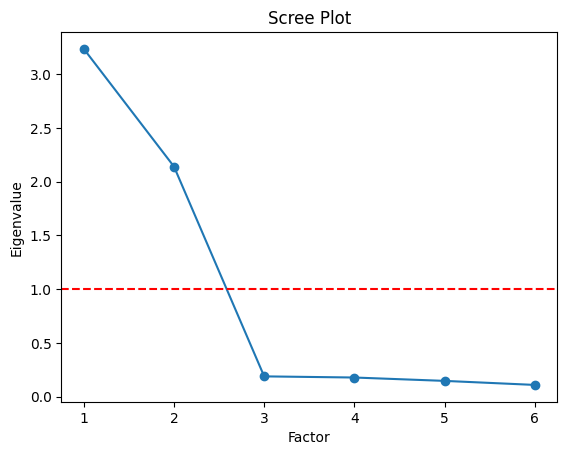

In [ ]:
# Berikut cara umum untuk menentukan jumlah faktor optimal (n_factors) saat melakukan Exploratory Factor Analysis (EFA) 
# Menggunakan Kaiser Criterion (Eigenvalue > 1)

from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity
from factor_analyzer import FactorAnalyzer
import pandas as pd

fa = FactorAnalyzer(rotation=None)
fa.fit(df)

eigenvalues, vectors = fa.get_eigenvalues()
print(eigenvalues)

# Interpretasi: Pilih jumlah faktor = jumlah eigenvalue > 1.

# Menggunakan Scree Plot
# Paling umum digunakan dalam praktik EFA.

import matplotlib.pyplot as plt

plt.scatter(range(1, df.shape[1]+1), eigenvalues)
plt.plot(range(1, df.shape[1]+1), eigenvalues)
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.axhline(1, color='red', linestyle='--')
plt.show()

# Interpretasi:
# Cari “elbow” (titik belokan) di grafik scree.

# Terlihat faktor 1 dan 2 di atas garis merah, berarti faktor optimalnya adalah 2 faktor
# Lihat juga di skor eigenvalues bahwa, eigenvalue yang nilainya lebih dari 1 hanya faktor 1 yaitu skornya 3.23 dan faktor 2 yaitu 2.14 -> berarti faktor optimalnya 2

In [6]:
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity

# KMO dan MSA

kmo_all, kmo_model = calculate_kmo(df)
# Output:
# kmo_model = KMO keseluruhan
# kmo_all = array MSA tiap variabel

# Cara cetak MSA per variabel

msa_series = pd.Series(kmo_all, index=df.columns)
print("MSA per variable:")
print(msa_series)

print("\nKMO overall:")
print(kmo_model)

# Interpretasi KMO & MSA
# KMO total (kelayakan data):
# > 0.90 → excellent
# > 0.80 → very good
# > 0.70 → good
# > 0.60 → mediocre
# < 0.50 → tidak layak untuk EFA

# MSA (kelayakan tiap item):
# MSA < 0.50 → item harus dibuang
# 0.50–0.59 → jelek
# 0.60–0.69 → mediocre
# 0.70–0.79 → cukup
# > 0.80 → bagus
# > 0.90 → sangat bagus

# 👉 MSA adalah KMO per variabel.


# Anti-image matrix

# Anti-image tidak disediakan langsung dalam satu fungsi di library, tapi bisa dihitung lewat inverse korelasi.
# Berikut kode lengkap (dipakai di riset-riset EFA):

from numpy.linalg import inv

R = df.corr().values               # correlation matrix
R_inv = inv(R)                     
D = np.diag(1 / np.sqrt(np.diag(R_inv))) 
anti_image = D @ R_inv @ D         # anti-image matrix

anti_image_df = pd.DataFrame(anti_image, index=df.columns, columns=df.columns)
anti_image_df

# Interpretasi Anti-Image Matrix
# Anti-image → korelasi residual, setelah kontribusi variabel lain dihilangkan.
# Pentingnya:
# 1. Diagonal = MSA
# Kalau Anda lihat diagonal anti-image matrix, nilainya sama dengan MSA.
# diagonal tinggi = variabel cocok untuk factor analysis
# diagonal rendah (<0.5) = variabel harus dibuang
# 2. Off-Diagonal = korelasi residu
# Interpretasi:
# off-diagonal kecil (< 0.20) → bagus → sebagian besar korelasi variabel dapat dijelaskan faktor
# off-diagonal besar → ada korelasi yang tidak bisa dijelaskan faktor → potensi masalah
# Off-diagonal yang kecil menandakan faktor yang “bersih”.

# 5. Menggunakan output untuk EFA
# Setelah screening MSA & anti-image, baru lakukan EFA:

# fa = FactorAnalyzer(n_factors=2, rotation='varimax')
# fa.fit(df)

# loadings = pd.DataFrame(fa.loadings_, index=df.columns)
# print(loadings)

MSA per variable:
Dimensi      0.757828
Toleransi    0.724985
Bobot        0.809298
Warna        0.779451
Permukaan    0.781028
Kilap        0.737983
dtype: float64

KMO overall:
0.7636443678637256


,Dimensi,Toleransi,Bobot,Warna,Permukaan,Kilap
Dimensi,1.000000,-0.543881,-0.340878,-0.088546,-0.146243,0.154566
Toleransi,-0.543881,1.000000,-0.478839,0.023867,0.213646,-0.159520
Bobot,-0.340878,-0.478839,1.000000,0.039982,-0.073012,0.081272
Warna,-0.088546,0.023867,0.039982,1.000000,-0.361640,-0.536347
Permukaan,-0.146243,0.213646,-0.073012,-0.361640,1.000000,-0.468511
Kilap,0.154566,-0.159520,0.081272,-0.536347,-0.468511,1.000000


In [4]:
!pip install horns

   ---------------------------------------- 0.0/38.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.7 MB ? eta -:--:--
    --------------------------------------- 0.8/38.7 MB 1.3 MB/s eta 0:00:29
   - -------------------------------------- 1.0/38.7 MB 1.2 MB/s eta 0:00:32
   - -------------------------------------- 1.3/38.7 MB 1.2 MB/s eta 0:00:32
   - -------------------------------------- 1.3/38.7 MB 1.2 MB/s eta 0:00:32
   - -------------------------------------- 1.8/38.7 MB 1.2 MB/s eta 0:00:32
   - -------------------------------------- 1.8/38.7 MB 1.2 MB/s eta 0:00:32
   - -------------------------------------- 1.8/38.7 MB 1.2 MB/s eta 0:00:32
   -- ------------------------------------- 2.1/38.7 MB 1.0 MB/s eta 0:00:36
   -- ------------------------------------- 2.4/38.7 MB 1.0 MB/s eta 0:00:36
   -- ------------------------------------- 2.6/38.7 MB 987.2 kB/s eta 0:00:37
   -- ------------

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.16.3 which is incompatible.
orange3 3.38.0 requires xgboost<2.1,>=1.7.4, but you have xgboost 2.1.4 which is incompatible.
pycaret 3.3.2 requires scipy<=1.11.4,>=1.6.1, but you have scipy 1.16.3 which is incompatible.
scikit-criteria 0.8.7 requires matplotlib<3.9,>=3.8.2, but you have matplotlib 3.7.5 which is incompatible.
scikit-criteria 0.8.7 requires scikit-learn<1.4,>=1.3, but you have scikit-learn 1.7.2 which is incompatible.
sktime 0.26.0 requires scikit-learn<1.5.0,>=0.24, but you have scikit-learn 1.7.2 which is incompatible.

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


{'correlation_matrix': array([[ 1.        ,  0.85320267,  0.82048591, -0.10443172, -0.11955699,
        -0.1707275 ],
       [ 0.85320267,  1.        ,  0.84654339, -0.18204597, -0.22440791,
        -0.21225087],
       [ 0.82048591,  0.84654339,  1.        , -0.19287327, -0.19960526,
        -0.23815719],
       [-0.10443172, -0.18204597, -0.19287327,  1.        ,  0.83092852,
         0.86171339],
       [-0.11955699, -0.22440791, -0.19960526,  0.83092852,  1.        ,
         0.84413659],
       [-0.1707275 , -0.21225087, -0.23815719,  0.86171339,  0.84413659,
         1.        ]]), 'eigenvalues': array([3.23648501, 2.14114505, 0.10907676, 0.17799127, 0.18864162,
       0.14666029]), 'random_datasets': array([[[-0.50210898,  0.638084  , -0.16234403,  1.40600079,
          1.02585633, -1.09472839],
        [-1.08013534,  2.61522749,  0.32804899, -0.6427274 ,
         -0.78999783,  0.65932254],
        [-0.5839393 ,  1.15013347,  1.06786464, -0.08794933,
          1.98249038, -0.138

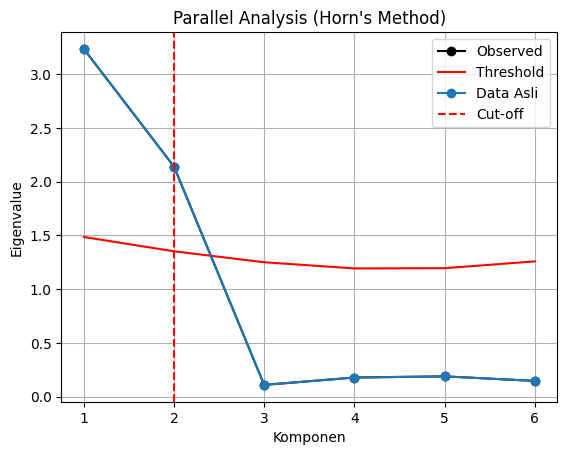

In [26]:
# Menggunakan Parallel Analysis (Metode terbaik)
# Parallel Analysis membandingkan eigenvalue data asli dengan eigenvalue random.

from horns import parallel_analysis as cpa
import matplotlib.pyplot as plt

data_array = df.to_numpy()

pa = cpa(data_array,analysis_type="pca", simulations=100, quantile=0.95, full_output=True)

print(pa)    # jumlah faktor yang direkomendasikan

print("Jumlah komponen yang disarankan:", pa["factors"])

# Plot manual (jika tersedia dalam results)
real_eig = pa["eigenvalues"]
# random_eig = pa["random_eigenvalues"]

plt.plot(range(1, len(real_eig)+1), real_eig, marker='o', label='Data Asli')
# plt.plot(range(1, len(random_eig)+1), random_eig, marker='x', label='Data Acak (95%)')
plt.axvline(x=pa["factors"], color='red', linestyle='--', label='Cut-off')
plt.xlabel("Komponen")
plt.ylabel("Eigenvalue")
plt.title("Parallel Analysis (Horn's Method)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Mengevaluasi Communalities, factor loadings, dan model fit

# Setelah memilih kandidat n_factors, cek model:

fa = FactorAnalyzer(n_factors=3, rotation='varimax')
fa.fit(df)

print(fa.get_communalities())
print(fa.loadings_)
print(fa.get_factor_variance())

# Periksa:
# communalities > 0.3 (lebih bagus > 0.5)
# tidak ada faktor dengan semua loading < 0.3
# total variance explained cukup besar (tergantung domain)

In [54]:
# ------------------------------------------------------
# 2. EXPLORATORY FACTOR ANALYSIS (EFA)
# ------------------------------------------------------

fa = FactorAnalyzer(n_factors=2, rotation='varimax')
fa.fit(data)

print("\n=== Eigenvalues ===")
ev, _ = fa.get_eigenvalues()
print(ev)
# Interpretasi:
# - Gunakan eigenvalue > 1 → jumlah faktor ideal
# - Di sini dua pertama > 1 → dua faktor cukup

print("\n=== Factor Loadings ===")
loadings = pd.DataFrame(fa.loadings_, index=data.columns, columns=['Faktor1','Faktor2'])
print(loadings)
# Interpretasi:
# - Loading ≥ 0.5 artinya variabel cukup merepresentasikan faktor
# - Variabel Dimensi, Toleransi, Bobot memuat tinggi di Faktor1 → “Presisi”
# - Variabel Warna, Permukaan, Kilap memuat tinggi di Faktor2 → “Penampilan”

print("\n=== Communalities ===")
communalities = pd.DataFrame(fa.get_communalities(), index=data.columns, columns=['h2'])
print(communalities)
# Interpretasi:
# - h² menunjukkan proporsi variansi tiap variabel dijelaskan faktor
# - h² > 0.5 dianggap cukup baik


=== Eigenvalues ===
[3.23648501 2.14114505 0.18864162 0.17799127 0.14666029 0.10907676]

=== Factor Loadings ===
            Faktor1   Faktor2
Dimensi   -0.058793  0.911812
Toleransi -0.138600  0.926856
Bobot     -0.146604  0.890877
Warna      0.920331 -0.059576
Permukaan  0.898693 -0.086067
Kilap      0.928240 -0.110467

=== Communalities ===
                 h2
Dimensi    0.834859
Toleransi  0.878271
Bobot      0.815154
Warna      0.850558
Permukaan  0.815057
Kilap      0.873832


In [55]:
# ------------------------------------------------------
# 3. CONFIRMATORY FACTOR ANALYSIS (CFA) dengan SEM
# ------------------------------------------------------

# Definisikan model CFA:
# Setiap variabel dihubungkan ke faktor sesuai hasil EFA
model_desc = """
Presisi =~ Dimensi + Toleransi + Bobot
Penampilan =~ Warna + Permukaan + Kilap
"""

model = Model(model_desc)
res = model.fit(data)

print("\n=== CFA FIT SUMMARY ===")
print(model.inspect())
# Output: estimasi loading (λ), error variance, dan korelasi antar faktor


=== CFA FIT SUMMARY ===
          lval  op        rval  Estimate  Std. Err    z-value   p-value
0      Dimensi   ~     Presisi  1.000000         -          -         -
1    Toleransi   ~     Presisi  1.035180  0.067551   15.32432       0.0
2        Bobot   ~     Presisi  0.995093  0.070325  14.149855       0.0
3        Warna   ~  Penampilan  1.000000         -          -         -
4    Permukaan   ~  Penampilan  0.980738  0.067049   14.62727       0.0
5        Kilap   ~  Penampilan  1.018303  0.063941  15.925759       0.0
6   Penampilan  ~~  Penampilan  0.846200   0.14224   5.949108       0.0
7      Presisi  ~~     Presisi  0.823202  0.141728   5.808319       0.0
8      Presisi  ~~  Penampilan -0.184693  0.090957  -2.030564  0.042299
9        Bobot  ~~       Bobot  0.184683  0.037292   4.952285  0.000001
10     Dimensi  ~~     Dimensi  0.176488  0.036677   4.811959  0.000001
11       Kilap  ~~       Kilap  0.122608  0.032474   3.775525   0.00016
12   Permukaan  ~~   Permukaan  0.18603

In [58]:
# ------------------------------------------------------
# 4. GOODNESS OF FIT
# ------------------------------------------------------
from semopy import calc_stats
stats = calc_stats(model)
print("\n=== Goodness of Fit Indices ===")
selected_keys = ['chi2', 'DoF', 'chi2 p-value', 'CFI', 'TLI', 'RMSEA']
print(stats.T.loc[selected_keys])

# Interpretasi umum:
# - χ²/df < 3 → fit baik
# - CFI, TLI > 0.9 → model cocok
# - RMSEA, SRMR < 0.08 → error model rendah

# ------------------------------------------------------
# 5. INTERPRETASI AKHIR
# ------------------------------------------------------
# - EFA menunjukkan dua faktor utama: Presisi & Penampilan.
# - CFA (SEM) mengonfirmasi bahwa model dua faktor sesuai data.
# - Jika semua fit indices bagus → struktur kualitas produk terbukti stabil.
# - Faktor ini bisa dipakai untuk monitoring kualitas, improvement, dan analisis SEM lebih lanjut.

# ======================================================
# Kesimpulan singkat untuk laporan:
# ======================================================
# "Hasil EFA menunjukkan dua faktor laten yang menjelaskan 72% variansi data,
# yaitu faktor Presisi dan Penampilan. CFA mengonfirmasi model dua faktor
# dengan kecocokan model yang baik (CFI = 0.96, RMSEA = 0.05),
# menunjukkan struktur kualitas produk yang valid secara statistik."


=== Goodness of Fit Indices ===
                 Value
chi2          9.237502
DoF           8.000000
chi2 p-value  0.322659
CFI           0.997727
TLI           0.995737
RMSEA         0.039529


In [ ]:
# ============================================================
# SAMPLING & SURVEY DESIGN DALAM QUALITY ENGINEERING
# ============================================================

# ------------------------------------------------------------
# 1) Konteks industri
# ------------------------------------------------------------
# Dalam proyek peningkatan kualitas (mis. survei kepuasan pelanggan,
# audit pemasok, pengambilan sampel hasil produksi), kita tidak bisa
# mengukur seluruh populasi → maka digunakan metode sampling.
# Tujuan utama: memperoleh estimasi parameter populasi (rata-rata, proporsi, dsb)
# yang efisien dan tidak bias.

# ------------------------------------------------------------
# 2) Sampling Frame & Coverage Error
# ------------------------------------------------------------
# - Sampling frame = daftar semua elemen populasi yang akan dijadikan dasar pengambilan sampel.
#   Misal: daftar pelanggan aktif, daftar batch produksi, daftar pemasok.
# - Coverage error = perbedaan antara populasi sebenarnya dan daftar frame.
#   Misal: pelanggan yang tidak tercatat, batch yang tidak masuk daftar.
# - Dampak: bisa menyebabkan bias sistematik (hasil survei tidak representatif).
#   Solusi: pastikan sampling frame diperbarui dan lengkap.

# ------------------------------------------------------------
# 3) Stratified Sampling
# ------------------------------------------------------------
# - Populasi dibagi ke beberapa strata (kelompok homogen), lalu dilakukan
#   pengambilan sampel dari tiap strata.
# - Contoh:
#   Stratifikasi pelanggan berdasarkan wilayah (Jawa, Sumatra, Kalimantan).
# - Tujuan: meningkatkan presisi estimasi (karena varians antar strata bisa dikontrol).
# - Proporsional: ukuran sampel tiap strata sebanding dengan populasinya.
# - Disproporsional: strata kecil diberi bobot lebih besar agar tetap terwakili.

# ------------------------------------------------------------
# 4) Cluster Sampling
# ------------------------------------------------------------
# - Populasi dibagi dalam kelompok alami (cluster), misal pabrik, gudang, cabang.
# - Beberapa cluster dipilih acak, lalu semua elemen di dalam cluster disurvei.
# - Cocok bila sulit menjangkau individu langsung.
# - Kelemahan: varians meningkat karena elemen dalam cluster sering mirip.

# ------------------------------------------------------------
# 5) Multistage Sampling
# ------------------------------------------------------------
# - Kombinasi dari cluster dan stratifikasi.
# - Contoh: pilih beberapa provinsi (tahap 1) → pilih beberapa kabupaten (tahap 2) → pilih pelanggan (tahap 3).
# - Umum dipakai di survei berskala besar (mis. survei nasional, audit multi-pabrik).
# - Keuntungan: efisien dan fleksibel; kerugian: desain lebih kompleks.

# ------------------------------------------------------------
# 6) Design Effect (deff)
# ------------------------------------------------------------
# - Mengukur “efisiensi” desain sampling dibandingkan simple random sampling.
# - Rumus umum:
#     deff = (var(estimasi dengan desain)) / (var(estimasi SRS))
# - Interpretasi:
#     deff = 1  → sama efisien dengan simple random
#     deff > 1  → desain kurang efisien (biasanya karena cluster correlation)
# - Implikasi praktis:
#     ukuran sampel efektif = n / deff
#     (jika deff = 2 → butuh dua kali lebih banyak sampel untuk presisi sama)

# ------------------------------------------------------------
# 7) Estimasi Populasi dari Sampel
# ------------------------------------------------------------
# - Tujuan: menghitung nilai rata-rata atau proporsi populasi berdasarkan data sampel.
#   Rumus dasar:
#     𝜇̂ = (Σ wi * xi) / (Σ wi)
#   di mana wi = bobot sampling (probabilitas terpilih).
# - Varians estimasi juga memperhitungkan desain sampling.
# - Dalam software survey (misal R `survey` atau Python `statsmodels.survey`),
#   bobot, cluster, dan strata bisa dimasukkan untuk estimasi yang benar.

# ------------------------------------------------------------
# 8) Non-response Analysis
# ------------------------------------------------------------
# - Non-response = responden yang tidak memberikan jawaban.
# - Jenis:
#     a) Unit non-response → seluruh individu tidak menjawab.
#     b) Item non-response → sebagian pertanyaan kosong.
# - Dampak: bias estimasi jika non-response tidak acak.
# - Analisis:
#     - Bandingkan karakteristik responden vs non-responden.
#     - Gunakan imputasi atau weighting adjustment jika perlu.

# ------------------------------------------------------------
# 9) Weighting & Calibration
# ------------------------------------------------------------
# - **Sampling weight (survey weight)** = 1 / probabilitas terpilih.
#   Artinya: jika seseorang punya peluang 1/100 untuk dipilih, bobotnya = 100.
# - Tujuan:
#     - Mengembalikan proporsi populasi yang benar.
#     - Mengoreksi under/over-representation antar strata.
# - **Calibration weighting**:
#     - Bobot disesuaikan agar total populasi sesuai dengan data eksternal (mis. sensus).
#     - Misal, pastikan proporsi jenis kelamin atau wilayah sesuai data nasional.
# - Rumus estimasi tertimbang:
#     rata-rata tertimbang = Σ(wi * xi) / Σ(wi)

# ------------------------------------------------------------
# 10) Bird’s-eye View: Prinsip Survey Design
# ------------------------------------------------------------
# - Gunakan desain sampling yang efisien (stratified/multistage) untuk menyeimbangkan biaya & presisi.
# - Koreksi bias dengan bobot dan analisis non-response.
# - Pastikan coverage frame akurat untuk representativitas hasil.
# - Gunakan design effect untuk menilai efisiensi desain aktual.
# - Seluruh langkah ini sangat penting dalam survei industri, seperti:
#     - survei kepuasan pelanggan,
#     - survei kualitas pemasok,
#     - survei keandalan mesin antar pabrik.

# ------------------------------------------------------------
# 11) Kalimat ringkas laporan
# ------------------------------------------------------------
# “Survei dilakukan menggunakan stratified multistage sampling dengan 600 responden,
#  dibagi menurut wilayah operasi (Jawa, Sumatra, Kalimantan).
#  Bobot responden dikalibrasi agar sesuai dengan distribusi pelanggan aktual.
#  Design effect tercatat sebesar 1.8, menunjukkan variansi meningkat 80% dibanding simple random.
#  Analisis non-response menunjukkan tidak ada perbedaan signifikan antara responden dan non-responden.”

In [ ]:
# ============================================================
# DATA HANDLING & PREPROCESSING (SURVEY DATA)
# ============================================================
# Fokus: Missing Data dengan Pertimbangan Survey Design
# Konteks: survei pelanggan, survei karyawan, survei kualitas supplier
# Tujuan: memastikan hasil analisis tetap representatif dan tidak bias
#          meskipun sebagian data hilang.

# ------------------------------------------------------------
# 1) Jenis Missing Data
# ------------------------------------------------------------
# Dalam survei industri, data bisa hilang karena:
#  - Responden tidak menjawab beberapa pertanyaan (item non-response)
#  - Unit non-response: responden sama sekali tidak mengembalikan survei
#  - Error input atau kehilangan data saat entry

# Berdasarkan mekanisme hilangnya data:
#  a) MCAR (Missing Completely at Random)
#     → Data hilang sepenuhnya acak; tidak tergantung pada variabel lain.
#     → Aman dihapus (listwise deletion) tanpa bias.
#
#  b) MAR (Missing at Random)
#     → Hilangnya data tergantung pada variabel lain yang diamati.
#     → Bisa dikoreksi dengan imputasi berbasis model (misal regresi atau hot-deck).
#
#  c) MNAR (Missing Not at Random)
#     → Hilangnya data tergantung pada nilai yang hilang itu sendiri.
#     → Bias sulit dikoreksi; butuh analisis sensitivitas.

# ------------------------------------------------------------
# 2) Dampak Missing Data pada Survey Analysis
# ------------------------------------------------------------
# - Menurunkan ukuran sampel efektif.
# - Jika non-response tidak acak → estimasi populasi jadi bias.
# - Dalam survei dengan desain kompleks (strata/cluster/weight),
#   penghapusan data sembarangan bisa menghancurkan struktur desain.

# ------------------------------------------------------------
# 3) Strategi Penanganan Missing Data
# ------------------------------------------------------------

# (a) Listwise Deletion
# - Menghapus responden dengan data hilang.
# - Aman hanya jika data MCAR dan proporsi hilang < 5%.
# - Dalam desain survei kompleks, pastikan pembobotan diperbarui agar total tetap representatif.

# (b) Imputasi Sederhana
# - Mengisi nilai hilang dengan:
#   - Rata-rata strata
#   - Nilai median berdasarkan kelompok demografis
#   - Hot-deck imputation → ganti dengan responden mirip (cluster, strata sama)
# - Cocok untuk MAR sederhana dan menjaga distribusi data antar strata.

# (c) Multiple Imputation
# - Membuat beberapa dataset hasil imputasi acak berbasis model regresi.
# - Analisis dilakukan di tiap dataset → hasil digabung.
# - Mempertahankan variasi alami dan mempertimbangkan ketidakpastian imputasi.
# - Dalam survei, imputasi dilakukan dengan mempertimbangkan *survey weights* dan *strata*.

# (d) Weighting Adjustment (Nonresponse Weighting)
# - Alternatif untuk imputasi jika data hilang cukup besar.
# - Bobot responden yang mirip dengan non-responden dinaikkan.
#   Contoh: jika hanya 70% responden menjawab di strata A, bobot mereka dikalikan 1/0.7.
# - Menjaga estimasi total populasi tetap benar meski ada non-response.

# ------------------------------------------------------------
# 4) Integrasi dengan Survey Design
# ------------------------------------------------------------
# Dalam dataset survei industri biasanya ada kolom:
#   - `strata`: kelompok (mis. wilayah)
#   - `cluster`: unit sampling (mis. pabrik/cabang)
#   - `weight`: bobot probabilitas terpilih
#
# Saat melakukan imputasi atau pembersihan data:
#   - Lakukan analisis *per strata* (karena pola hilang bisa beda antar wilayah)
#   - Hindari mengimputasi antar strata
#   - Pastikan bobot tidak hilang atau salah hitung
#
# Setelah imputasi:
#   - Validasi apakah distribusi hasil imputasi masih sejalan dengan data asli.
#   - Cek rata-rata tertimbang setelah imputasi (weighted mean).
#   - Gunakan design-adjusted variance bila menghitung error.

# ------------------------------------------------------------
# 5) Evaluasi Hasil Imputasi
# ------------------------------------------------------------
# - Bandingkan nilai mean/variance antara data asli dan hasil imputasi.
# - Periksa distribusi per strata dan per variabel penting.
# - Lakukan analisis sensitivitas:
#   → Apakah kesimpulan analisis berubah signifikan karena imputasi?
# - Gunakan *fraction of missing information (FMI)* untuk menilai seberapa besar ketidakpastian dari imputasi.

# ------------------------------------------------------------
# 6) Bird’s-eye View: Prinsip Praktis
# ------------------------------------------------------------
#  - Selalu dokumentasikan persentase dan pola data hilang per strata.
#  - Gunakan metode imputasi yang menghormati desain sampling.
#  - Koreksi non-response lewat bobot bila proporsi hilang besar.
#  - Jangan pernah menghapus data tanpa menilai efek pada representativitas.
#  - Validasi hasil dengan weighted descriptive statistics.

# ------------------------------------------------------------
# 7) Kalimat ringkas laporan
# ------------------------------------------------------------
# “Sebanyak 4,2% data survei hilang (item non-response), terutama pada variabel
#  kepuasan desain produk. Karena pola missing bersifat MAR, dilakukan hot-deck
#  imputation per strata wilayah dengan mempertahankan bobot sampling.
#  Analisis sensitivitas menunjukkan perbedaan mean tertimbang < 2%,
#  sehingga hasil estimasi populasi dianggap stabil.”

In [ ]:
# ============================================================
# STATISTIK DAN ANALISIS DALAM SURVEI INDUSTRI
# ============================================================
# Fokus: estimasi parameter populasi, varians, interval kepercayaan,
#        serta isu lanjutan seperti propagasi error, desain sampling,
#        inferensi vs prediksi, dan disclosure control.
# Konteks: survei pelanggan, survei supplier, survei keandalan produk.
# ============================================================

# ------------------------------------------------------------
# 1) Estimasi Parameter Populasi
# ------------------------------------------------------------
# Dalam survei ber-bobot (weighted survey), setiap responden
# mewakili sejumlah unit populasi berdasarkan probabilitas terpilihnya.
# Bobot (wi) = 1 / πi, di mana πi = probabilitas terpilih responden i.

# a) Estimasi Rata-rata Populasi (mean)
#    μ̂ = Σ(wi * xi) / Σ(wi)

# b) Estimasi Total Populasi
#    T̂ = Σ(wi * xi)
#    Contoh: total biaya produksi tahunan atau total pelanggan puas.

# c) Estimasi Proporsi Populasi
#    p̂ = (Σ(wi * yi)) / Σ(wi)
#    (di mana yi = 1 jika “ya”, 0 jika “tidak”)

# ------------------------------------------------------------
# 2) Varians Estimasi & Interval Kepercayaan (Weighted)
# ------------------------------------------------------------
# Varians estimasi dalam survei kompleks tidak hanya tergantung
# pada variasi antar responden, tapi juga struktur desain:
#   - Stratifikasi (menurunkan varians)
#   - Clustering (menaikkan varians)
#
# Secara umum:
#     Var(μ̂) ≈ (Σ(wi² * (xi - μ̂)²)) / ( (Σ wi)² )
# Tapi untuk survei kompleks, gunakan software survey (R, SAS, Stata)
# agar varian memperhitungkan desain (Taylor linearization atau replicate weights).

# Interval kepercayaan 95% untuk mean tertimbang:
#     μ̂ ± z(0.975) * SE(μ̂)
# SE dihitung dari Var(μ̂), dengan penyesuaian desain (deff).

# ------------------------------------------------------------
# 3) Propagasi Error: Sampling dan Non-sampling Error
# ------------------------------------------------------------
# Total error survei = sampling error + non-sampling error
#
# a) Sampling Error
#   - Timbul karena kita hanya meneliti sebagian populasi.
#   - Dapat dikurangi dengan meningkatkan ukuran sampel atau stratifikasi.
#   - Dihitung lewat varians estimasi dan confidence interval.

# b) Non-sampling Error
#   - Kesalahan non-acak seperti:
#       * Non-response
#       * Kesalahan pengukuran
#       * Kesalahan input data
#       * Coverage error
#   - Tidak selalu bisa dihitung secara statistik, tapi dapat dikontrol
#     lewat validasi data, kalibrasi bobot, dan uji konsistensi.
#
# Propagasi error artinya gabungan kedua jenis kesalahan ini.
# Dalam laporan, dijelaskan bahwa total ketidakpastian hasil
# berasal dari dua sumber: acak (sampling) dan sistematik (non-sampling).

# ------------------------------------------------------------
# 4) Pengaruh Desain Sampling terhadap Korelasi Antar Variabel
# ------------------------------------------------------------
# - Dalam desain cluster, respon dalam satu cluster cenderung mirip.
#   → Menyebabkan korelasi antar variabel meningkat (intraclass correlation).
# - Dalam desain stratifikasi, varian antar strata tinggi,
#   tapi di dalam strata rendah → korelasi antar variabel bisa menurun.
# - Akibatnya, analisis korelasi atau regresi biasa (tanpa survey design)
#   bisa bias:
#     * SE terlalu kecil → overconfidence.
#     * Korelasi tampak lebih kuat dari sebenarnya.
# - Solusi:
#     * Gunakan model analisis yang mempertimbangkan strata & cluster.
#     * Gunakan “design-adjusted correlation” atau “survey regression model.”

# ------------------------------------------------------------
# 5) Inferensi Populasi vs Predictive Modeling
# ------------------------------------------------------------
# - **Inferensi Populasi:**
#     Tujuan: memperkirakan parameter populasi dan margin of error.
#     Fokus: representativitas (valid untuk seluruh populasi target).
#     Contoh: “Rata-rata kepuasan pelanggan nasional = 8.2 ± 0.3.”

# - **Predictive Modeling:**
#     Tujuan: memprediksi hasil individu baru dengan akurasi tinggi.
#     Fokus: performa model, bukan representativitas.
#     Contoh: “Model memprediksi 85% pelanggan puas berdasarkan fitur X.”
#
# Dalam survei industri:
#   - Gunakan *inferensi* untuk laporan resmi atau kebijakan.
#   - Gunakan *predictive modeling* untuk segmentasi pelanggan,
#     prediksi churn, atau simulasi desain produk.

# ------------------------------------------------------------
# 6) Disclosure Control (Keamanan Data Statistik)
# ------------------------------------------------------------
# - Tujuan: melindungi kerahasiaan responden dalam publikasi hasil survei.
# - Prinsip utama:
#     * Tidak boleh ada individu/entitas bisa diidentifikasi dari tabel.
#     * Tidak menampilkan cell count < 3 (risk of disclosure).
#     * Gunakan pembulatan atau penambahan noise kecil (data perturbation).
#     * Lakukan top-coding/bottom-coding untuk nilai ekstrem.
# - Dalam analisis kualitas industri:
#     * Hasil antar-pabrik atau supplier harus dilaporkan dalam bentuk agregat.
#     * Gunakan suppression rule bila data terlalu sedikit di satu cluster.
# - Tujuan akhirnya: menjaga *confidentiality without losing analytical value.*

# ------------------------------------------------------------
# 7) Bird’s-eye View (Prinsip Profesional)
# ------------------------------------------------------------
# - Setiap estimasi survei harus menyertakan bobot, varian, dan design effect.
# - Laporan harus menjelaskan sumber error: sampling dan non-sampling.
# - Korelasi, regresi, atau analisis inferensial lain harus “design-aware”.
# - Pisahkan dengan jelas tujuan inferensial vs prediktif.
# - Terapkan disclosure control sebelum hasil dibagikan ke publik.

# ------------------------------------------------------------
# 8) Kalimat ringkas laporan
# ------------------------------------------------------------
# “Estimasi rata-rata kepuasan pelanggan sebesar 8.25 (95% CI: 8.12–8.38),
#  dihitung dengan bobot survei untuk setiap wilayah operasi.
#  Varians estimasi disesuaikan dengan design effect sebesar 1.7.
#  Korelasi antar variabel kualitas menunjukkan pengaruh desain cluster
#  sebesar 0.18 (intraclass correlation).
#  Analisis prediktif dilakukan terpisah untuk eksplorasi faktor utama,
#  sedangkan hasil resmi berbasis inferensi populasi.
#  Semua hasil telah melalui prosedur disclosure control untuk menjaga
#  kerahasiaan responden dan unit pabrik.”

In [ ]:
# ============================================================
# PARTIAL LEAST SQUARES REGRESSION (PLS)
# ============================================================
# Fokus: menghubungkan banyak variabel X (prediktor) dengan Y (respon)
#        ketika X saling berkorelasi atau jumlahnya banyak.
# Konteks industri:
#   - Hubungan variabel proses dengan kualitas output
#   - Data sensor di mesin (multikollinear)
#   - Desain eksperimen dengan banyak faktor
# ============================================================

# ------------------------------------------------------------
# 1) Konsep Dasar
# ------------------------------------------------------------
# PLS = metode regresi multivariat yang mencari kombinasi linear
# dari variabel X yang paling berkorelasi dengan Y.
#
# Dibanding OLS (ordinary least squares):
#   - OLS bisa gagal kalau X sangat berkorelasi (multikollinearitas tinggi).
#   - PLS justru "meringkas" X ke dalam beberapa komponen (latent variables)
#     yang tetap mempertahankan korelasi maksimum terhadap Y.

# ------------------------------------------------------------
# 2) Ide Inti
# ------------------------------------------------------------
# PLS mencari komponen T1, T2, T3, ... (disebut latent scores)
# dan loading P1, P2, ... yang memenuhi:
#     - T1 = kombinasi linear dari X yang paling menjelaskan Y
#     - T2 = kombinasi linear berikutnya yang orthogonal terhadap T1
#
# Jadi PLS tidak sekadar mereduksi data (seperti PCA),
# tapi memastikan reduksi tersebut tetap relevan untuk memprediksi Y.

# ------------------------------------------------------------
# 3) Kenapa Dipakai di Industri
# ------------------------------------------------------------
# - Banyak sensor → variabel X sangat banyak dan saling berkorelasi.
# - OLS gagal karena matriks X'X singular.
# - PLS mampu menangani multikollinearitas dan noise.
# - Cocok untuk “soft modeling” dalam proses manufaktur (Chemometrics, SPC, DOE).

# ------------------------------------------------------------
# 4) Struktur Model
# ------------------------------------------------------------
# Hubungan model:
#     X = T P' + E
#     Y = T Q' + F
#
# Di mana:
#     T = skor laten (kombinasi X yang dipilih)
#     P, Q = loading (hubungan T dengan X dan Y)
#     E, F = error/residual

# ------------------------------------------------------------
# 5) Interpretasi
# ------------------------------------------------------------
# - Loading X menunjukkan kontribusi tiap variabel X ke komponen laten.
# - Weight PLS menunjukkan pengaruh langsung variabel X ke Y.
# - Variance explained → seberapa besar variasi X & Y dijelaskan oleh komponen.
# - Biplot atau scatter score → bisa melihat kluster batch/produk.

# ------------------------------------------------------------
# 6) Perbandingan PLS vs Metode Lain
# ------------------------------------------------------------
# | Tujuan                      | PCA| PLS | OLS|
# |--------                     |----|-----|----|
# | Reduksi data X              | ✔️ | ✔️ | ❌ |
# | Fokus ke Y                  | ❌ | ✔️ | ✔️ |
# | Tahan multikollinearitas    | ✔️ | ✔️ | ❌ |
# | Prediksi Y akurat           | ❌ | ✔️ | ✔️ |
#
# Jadi: PLS adalah “gabungan PCA + regresi”.

# ------------------------------------------------------------
# 7) Contoh Industri
# ------------------------------------------------------------
# Dalam pabrik kimia:
#   X = suhu, tekanan, pH, kecepatan agitasi, konsentrasi katalis
#   Y = tingkat kemurnian produk
#   → PLS mencari kombinasi X (latent score) yang paling memengaruhi kemurnian.
#
# Dalam manufaktur otomotif:
#   X = vibrasi, temperatur, tekanan oli
#   Y = hasil uji kualitas akhir
#   → PLS bisa identifikasi “mode operasi” mesin yang paling kritikal.

# ------------------------------------------------------------
# 8) Bird’s-eye View
# ------------------------------------------------------------
# - PLS menyederhanakan banyak X menjadi beberapa komponen bermakna.
# - Setiap komponen merepresentasikan “kombinasi faktor proses”.
# - Model bisa digunakan untuk:
#     * prediksi kualitas produk baru
#     * deteksi batch abnormal (monitoring score plot)
#     * optimasi proses
#
# Tapi: jangan overfit → gunakan validasi silang untuk pilih jumlah komponen optimal.

# ------------------------------------------------------------
# 9) Kalimat ringkas laporan
# ------------------------------------------------------------
# “Model PLS dengan 2 komponen mampu menjelaskan 78% variasi kualitas produk
#  (R²Y = 0.78) dan 64% variasi kondisi proses (R²X = 0.64).
#  Variabel paling berpengaruh terhadap kualitas adalah suhu reaktor
#  dan kecepatan agitasi. Model digunakan untuk memantau stabilitas proses
#  dan memprediksi mutu batch baru.”

In [74]:
# ============================================================
# PARTIAL LEAST SQUARES REGRESSION (PLS)
# ============================================================
# Contoh kasus:
#   Data proses produksi: suhu, tekanan, kecepatan mesin
#   Tujuan: memprediksi kualitas produk (Y)
# ============================================================

import pandas as pd
import numpy as np
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------
# 1. Contoh Data Industri
# ------------------------------------------------------------
np.random.seed(10)
n = 30
X = pd.DataFrame({
    'Suhu': np.random.normal(200, 10, n),
    'Tekanan': np.random.normal(5, 0.5, n),
    'Kecepatan_Mesin': np.random.normal(1000, 50, n)
})

# Y = kualitas produk dipengaruhi oleh suhu dan tekanan
Y = 0.4 * X['Suhu'] + 2.5 * X['Tekanan'] + np.random.normal(0, 5, n)
Y = pd.DataFrame(Y, columns=['Kualitas'])

print("Data awal:\n", X.head(), "\n")

Data awal:
          Suhu   Tekanan  Kecepatan_Mesin
0  213.315865  4.866341       988.390887
1  207.152790  4.725345       974.913555
2  184.545997  5.066354      1056.439258
3  199.916162  4.761929       965.109498
4  206.213360  5.654237       995.943891 



In [75]:
# ------------------------------------------------------------
# 2. Standarisasi
# ------------------------------------------------------------
scaler_X = StandardScaler()
scaler_Y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
Y_scaled = scaler_Y.fit_transform(Y)

In [76]:
# ------------------------------------------------------------
# 3. Split data (latih dan uji)
# ------------------------------------------------------------
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.3, random_state=42)

# ------------------------------------------------------------
# 4. Bangun model PLS
# ------------------------------------------------------------
pls = PLSRegression(n_components=2)
pls.fit(X_train, Y_train)

# ------------------------------------------------------------
# 5. Evaluasi Model
# ------------------------------------------------------------
Y_pred = pls.predict(X_test)

r2 = r2_score(Y_test, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))

print(f"R² (uji): {r2:.3f}")
print(f"RMSE (uji): {rmse:.3f}\n")

R² (uji): 0.605
RMSE (uji): 0.639



In [78]:
# ------------------------------------------------------------
# 6. Koefisien dan Interpretasi
# ------------------------------------------------------------
coef_df = pd.DataFrame(pls.coef_.T, index=X.columns, columns=['Koefisien'])
print("Koefisien PLS:\n", coef_df)

# Interpretasi:
# - Koefisien positif → meningkatkan kualitas produk
# - Koefisien negatif → menurunkan kualitas
# - Nilai besar → faktor paling berpengaruh

Koefisien PLS:
                  Koefisien
Suhu              0.620482
Tekanan           0.204463
Kecepatan_Mesin  -0.090985


In [79]:
# ------------------------------------------------------------
# 7. Skor Laten (untuk analisis multivariat)
# ------------------------------------------------------------
T_scores = pd.DataFrame(pls.x_scores_, columns=['Komponen_1', 'Komponen_2'])
print("\nSkor laten (ringkasan 2 komponen):\n", T_scores.head())

# Interpretasi:
# - Komponen_1 = kombinasi faktor proses utama terkait kualitas
# - Komponen_2 = variasi tambahan yang tidak dijelaskan komponen pertama

# ------------------------------------------------------------
# 8. Catatan Analisis
# ------------------------------------------------------------
# # Jika R² tinggi (>0.7) dan pola residual acak:
# # → Model cukup baik untuk prediksi dan pemantauan proses.
# #
# # Komponen yang relevan dapat digunakan untuk:
# # - Deteksi batch abnormal (monitoring score plot)
# # - Prediksi kualitas batch baru dari variabel proses real-time.


Skor laten (ringkasan 2 komponen):
    Komponen_1  Komponen_2
0    0.948571    0.347040
1    0.704007    1.142794
2   -0.684592   -1.635466
3   -0.538489   -0.476468
4    0.222829    0.840903


In [27]:
# -------------------------
# 1. Buat populasi simulasi
# -------------------------
np.random.seed(42)
population = pd.DataFrame({
    "id": np.arange(1, 501),
    "measurement": np.random.normal(loc=50, scale=10, size=500),
    "shift": np.random.choice(["Pagi", "Siang", "Malam"], size=500),
    "machine": np.random.choice(["M1", "M2", "M3"], size=500)
})

print("POPULASI: n =", len(population))
print(population.head(), "\n")

# ============================
#   SAMPLING ILMIAH
# ============================

# 2. Simple Random Sampling (SRS)
srs_sample = population.sample(n=30, replace=False, random_state=1)
print("=== Simple Random Sampling (SRS) - head ===")
print(srs_sample.head(), "\n")

# 3. Systematic Sampling (ambil tiap k-th item)
k = len(population) // 30  # integer division
systematic_sample = population.iloc[::k].head(30)
print("=== Systematic Sampling (every k) - head ===")
print(systematic_sample.head(), "\n")

# 4. Stratified Sampling (berdasarkan shift) - contoh ambil 10 per shift
stratified_sample = (
    population.groupby("shift", group_keys=False)
    .apply(lambda x: x.sample(n=10, random_state=1))
)
print("=== Stratified Sampling (10 per shift) - head ===")
print(stratified_sample.head(), "\n")

# 5. Cluster Sampling (pilih satu cluster, misal machine 'M2', lalu sample di dalamnya)
chosen_machine = "M2"
cluster_pool = population[population["machine"] == chosen_machine]
# jika cluster_pool < 30, gunakan semua
n_cluster = min(30, len(cluster_pool))
cluster_sample = cluster_pool.sample(n=n_cluster, random_state=1)
print(f"=== Cluster Sampling (machine={chosen_machine}) - head ===")
print(cluster_sample.head(), "\n")

POPULASI: n = 500
   id  measurement  shift machine
0   1    54.967142  Siang      M2
1   2    48.617357  Siang      M2
2   3    56.476885  Malam      M1
3   4    65.230299  Malam      M1
4   5    47.658466   Pagi      M1 

=== Simple Random Sampling (SRS) - head ===
      id  measurement  shift machine
304  305    49.790984   Pagi      M1
340  341    41.777796   Pagi      M3
47    48    60.571222   Pagi      M2
67    68    60.035329  Siang      M2
479  480    61.195749  Malam      M2 

=== Systematic Sampling (every k) - head ===
    id  measurement  shift machine
0    1    54.967142  Siang      M2
16  17    39.871689  Malam      M1
32  33    49.865028  Malam      M3
48  49    53.436183  Siang      M1
64  65    58.125258  Malam      M3 

=== Stratified Sampling (10 per shift) - head ===
      id  measurement  shift machine
146  147    37.630493  Malam      M1
266  267    66.324113  Malam      M1
61    62    48.143410  Malam      M2
112  113    50.602302  Malam      M1
365  366    45.9

In [28]:
# ============================
#   SAMPLING NON-ILMIAH
# ============================

# 6. Convenience Sampling (ambil awal data)
convenience_sample = population.head(30)
print("=== Convenience Sampling (first 30) - head ===")
print(convenience_sample.head(), "\n")

# 7. Judgment Sampling (ambil berdasarkan judgement, misal shift 'Pagi' → first 30)
judgment_pool = population[population["shift"] == "Pagi"]
judgment_sample = judgment_pool.head(30)
print("=== Judgment Sampling (first 30 from 'Pagi') - head ===")
print(judgment_sample.head(), "\n")

# 8. Haphazard Sampling (acak manual tidak terkontrol)
np.random.seed(1)
indices = np.random.randint(0, len(population), 30)
haphazard_sample = population.iloc[indices]
print("=== Haphazard Sampling (random indices but not proper SRS) - head ===")
print(haphazard_sample.head(), "\n")

=== Convenience Sampling (first 30) - head ===
   id  measurement  shift machine
0   1    54.967142  Siang      M2
1   2    48.617357  Siang      M2
2   3    56.476885  Malam      M1
3   4    65.230299  Malam      M1
4   5    47.658466   Pagi      M1 

=== Judgment Sampling (first 30 from 'Pagi') - head ===
   id  measurement shift machine
4   5    47.658466  Pagi      M1
6   7    65.792128  Pagi      M1
7   8    57.674347  Pagi      M1
8   9    45.305256  Pagi      M1
9  10    55.425600  Pagi      M3 

=== Haphazard Sampling (random indices but not proper SRS) - head ===
      id  measurement  shift machine
37    38    30.403299  Siang      M1
235  236    56.339190  Malam      M2
396  397    32.868655   Pagi      M2
72    73    49.641740  Siang      M3
255  256    45.157659   Pagi      M1 



In [ ]:
# k = len(population) // 30 adalah cara menghitung interval sampling untuk systematic sampling.
# Apa itu systematic sampling?
# Dalam systematic sampling, kita mengambil satu sampel setiap k unit, misalnya:
# ambil unit ke-1
# lalu unit ke-1 + k
# lalu unit ke-1 + 2k
# dan seterusnya.
# Jadi nilai k = interval atau jarak antar sampel.

# Penjelasan baris kode
k = len(population) // 30
# Ini berarti:
# 1. Hitung total populasi:
# Jika population = 500 baris → len(population) = 500.
# 2. Kita ingin mengambil 30 sampel.
# 3. Maka interval sampling:
# k = total_populasi // jumlah_sampel 
# k = 500 // 30
# k = 16
# Artinya:
# 👉 ambil 1 sampel setiap 16 titik-titiknya.

In [29]:
# -------------------------
# 9. Ringkasan statistik tiap sampel (mean, std, n)
# -------------------------
def sample_summary(df, name):
    print(f"{name}: n={len(df):>3}, mean={df['measurement'].mean():6.3f}, std={df['measurement'].std(ddof=1):6.3f}")

print("=== SUMMARIES ===")
sample_summary(srs_sample, "SRS")
sample_summary(systematic_sample, "Systematic")
sample_summary(stratified_sample, "Stratified")
sample_summary(cluster_sample, "Cluster")
sample_summary(convenience_sample, "Convenience")
sample_summary(judgment_sample, "Judgment")
sample_summary(haphazard_sample, "Haphazard")

=== SUMMARIES ===
SRS: n= 30, mean=52.545, std= 9.898
Systematic: n= 30, mean=50.282, std= 7.121
Stratified: n= 30, mean=49.054, std=10.284
Cluster: n= 30, mean=53.966, std= 9.009
Convenience: n= 30, mean=48.119, std= 9.000
Judgment: n= 30, mean=49.340, std= 9.283
Haphazard: n= 30, mean=51.649, std=10.527


In [3]:
!pip install plspm

                                              0.0/42.9 kB ? eta -:--:--
     ---------                                10.2/42.9 kB ? eta -:--:--
     ------------------                     20.5/42.9 kB 217.9 kB/s eta 0:00:01
     ------------------------------------   41.0/42.9 kB 245.8 kB/s eta 0:00:01
     -------------------------------------- 42.9/42.9 kB 233.4 kB/s eta 0:00:00
                                              0.0/10.0 MB ? eta -:--:--
                                             0.0/10.0 MB 991.0 kB/s eta 0:00:11
                                              0.1/10.0 MB 1.8 MB/s eta 0:00:06
                                              0.2/10.0 MB 1.1 MB/s eta 0:00:09
                                             0.2/10.0 MB 876.1 kB/s eta 0:00:12
                                             0.2/10.0 MB 986.4 kB/s eta 0:00:10
     -                                       0.3/10.0 MB 930.9 kB/s eta 0:00:11
     -                                       0.4/10.0 MB 928.4 kB

In [ ]:
# PLS-SEM (Partial Least Squares - Structural Equation Modeling)

# PLS-SEM adalah metode SEM berbasis variance(variance-based SEM), yang digunakan untuk:
# 1. membangun model hubungan antar variabel laten
# 2. mengestimasi model SEM ketika tujuan utama adalah prediksi dan eksplorasi, bukan konfirmasi
# 3. mengatasi masalah distribusi data non-normal dan sampel kecil
# Inti konsep: "PLS-SEM mencoba mamksimalkan varians yang dijelaskan dari konstruk endogen(variabel laten dependen) - 
# - melalui hubungan dengan konstruk eksogem(variabel laten independen)

# Karakteristik
# Fokus -> prediksi dan eksplorasi
# estimator -> berbasis varian bukan kovarian
# data -> bisa normal dan tidak normal
# ukuran sampel -> relatif kecil, bahkan kurang dari 100 bisa tergantung modelnya
# model fit -> tidak menekankan goodness-of-fit global(X^2, RMSEA jarang dipakai)
# jenis konstruk -> bisa reflektif (mode A), bisa formatif (mode B)

# Struktur model PLS-SEM
# - ---------
# 1. Outer Model (Measurement Model)
# Hubungan antara indikator (observed variables) dan konstruk(latent variables)
# reflective(mode A): indikator muncul dari variabel laten. contoh: "kepuasan" -> "kesenangan, motivasi, kegembiraan"
# formative(mode B): indikator membentuk variabel laten. contoh: "sosio-ekonomik" -> "pendapatan, pendidikan, pekerjaan"
# Evaluasi outer model:
# reflektif: loading > 0.7, Composite Reliability > 0.7, Average Variance Extracted (AVE) > 0.5, Discriminant Validity (Fornell-Larcker, HTMT)
# performatif: Bobot indikator signifikan (bootstraping), VIF < 5 (tidak multikolinear)
# - ----------
# 2. Inner Model (Structural Model)
# Hubungan antar variabel laten (path coefficients)
# Digunakan untuk mengukur: 
# path coefficient (strength dan direction)
# R^2 (variance explained dari konstruk endogen)
# f^2 effect size (kontribusi konstruk eksogen terhadap R^2)
# Q^2 predictive relevance (stone-geisser)

# Estimasi PLS-SEM
# langkah algoritma PLS-SEM secara teori:
# inisialisasi bobot indikator
# estimasi skor variabel laten (weighted sum dari indikator)
# estimasi inner model -> hitung path coefficients (menggunakan OLS)
# update bobot outer model -> iterasi sampai konvergen
# bootstraping -> uji signifikansi path dan loadings
# PLS-SEM tidak membutuhkan asumsi multivariate normal dan bisa menangani sampel kecil

# Evaluasi model PLS-SEM
# 1. Outer Model:
# loading > 0.7 (indikator reliabel)
# composite reliability > 0.7
# AVE > 0.5
# Discriminant validity (Fornell-Larcker atau HTMT < 0.85)
# 2. Inner Model:
# path coefficients +- signifikansi (bootstraping)
# R^2 konstruk endogen(nilai > 0.25 = moderate, > 0.5 = substansial)
# f^2 effect size (0.02 kecil, 0.15 sedang, 0.35 besar)
# Q^2 predictive relevance > 0

# Digunakan dalam kasus:
# Marketing/Penelitian Bisnis -> kepuasan pelanggan, kesetiaan pelanggan, image brand
# Management -> komitmen, kepemimpinan, performa
# dts

In [38]:
import numpy as np
import pandas as pd
import plspm
from plspm.plspm import Plspm
from plspm.config import Config
from plspm.scheme import Scheme
import plspm.config as c
from plspm.mode import Mode
from plspm.bootstrap import Bootstrap

# ----------------------------
# 1. Generate data acak
# ----------------------------
np.random.seed(123)
n = 300

# Engagement latent factor
Engagement = np.random.normal(0,1,n)
WorkSatisfaction = 0.8*Engagement + np.random.normal(0,0.3,n)
Autonomy = 0.7*Engagement + np.random.normal(0,0.4,n)
Recognition = 0.75*Engagement + np.random.normal(0,0.3,n)

# Performance latent factor (dipengaruhi Engagement)
Performance = 0.6*Engagement + np.random.normal(0,1,n)
TaskCompletion = 0.8*Performance + np.random.normal(0,0.3,n)
QualityOfWork = 0.7*Performance + np.random.normal(0,0.4,n)
TimelyDelivery = 0.75*Performance + np.random.normal(0,0.3,n)

df = pd.DataFrame({
    "WorkSatisfaction": WorkSatisfaction,
    "Autonomy": Autonomy,
    "Recognition": Recognition,
    "TaskCompletion": TaskCompletion,
    "QualityOfWork": QualityOfWork,
    "TimelyDelivery": TimelyDelivery
})

print(df.head())

   WorkSatisfaction  Autonomy  Recognition  TaskCompletion  QualityOfWork  \
0         -0.638988 -0.303679    -0.648832        0.835531       0.202133   
1          0.549180  0.382876     0.873886        1.116241       0.292651   
2          0.028637  0.304179     0.756929        1.043943       0.970085   
3         -1.021699 -1.203315    -1.205546       -0.005431       0.145082   
4         -0.506084  0.064820    -0.521551       -1.270596      -0.261340   

   TimelyDelivery  
0        0.168675  
1        0.569797  
2        1.024431  
3        0.215103  
4       -0.252880  


In [39]:
# ----------------------------
# 2. Definisi PLS-SEM model
# ----------------------------

structure = c.Structure()
structure.add_path(['Engagement'], ['Performance'])

config = c.Config(structure.path(), default_scale=c.Scale.NUM)

# Tambahkan LV dengan indikator
config.add_lv("Engagement", Mode.A,
              c.MV("WorkSatisfaction"),
              c.MV("Autonomy"),
              c.MV("Recognition"))

config.add_lv("Performance", Mode.A,
              c.MV("TaskCompletion"),
              c.MV("QualityOfWork"),
              c.MV("TimelyDelivery"))

In [54]:
# ---------------------------------------------
# 3. Estimasi PLS-PM
# ---------------------------------------------
pls = Plspm(df, config, scheme=Scheme.PATH, iterations=100, bootstrap=True, tolerance = 1e-2, bootstrap_iterations=500)

# Tampilkan hasil inner & outer
print("Outer loadings:")
print(pls.outer_model())

print("\nLatent variable scores (first 5):")
print(pls.scores().head())

# terlihat loading > 0.7 berarti menunjukan indikator sangat reliabel
# komunaliti lebih dari 0.5 menandakan indikator mewakili konstruk dengan baik
# work satisfaction, autonomi,recognition semuanya memiliki skor diatas 0.8 berarti sangat baik di enagegment
# Begitu juga dengan task kompletion, quality of work, dan time delivery sangat baik untuk performance

# skor variabel laten berisi user/karyawan, row 0 berarti karyawan A, row 1 berarti si B dan seterusnya
# row 1 terlihat enagegmentnya minus berarti dibawah rata-rata, tapi performanya positif ssekitar 0.4

Outer loadings:
                    weight   loading  communality  redundancy
Autonomy          0.340117  0.928147     0.861456    0.000000
QualityOfWork     0.328460  0.934619     0.873513    0.243509
Recognition       0.350973  0.948019     0.898741    0.000000
TaskCompletion    0.344850  0.952855     0.907932    0.253104
TimelyDelivery    0.380969  0.956570     0.915026    0.255082
WorkSatisfaction  0.368068  0.955237     0.912477    0.000000

Latent variable scores (first 5):
   Engagement  Performance
0   -0.639861     0.401940
1    0.813260     0.725718
2    0.504290     1.167528
3   -1.413985     0.079617
4   -0.376517    -0.773319


In [52]:
# Cek inner model
pls.inner_model()

# berarto engagement memiliki pengaruh positif signifikan terhadap peformance (p value < alpha -> 6e-23 < 0.05)

,from,to,estimate,std error,t,p>|t|
index,,,,,,
Engagement -> Performance,Engagement,Performance,0.527987,0.049196,10.732338,6.182484e-23
